# The project overview

The main goal of this work is to write and build a machine learning algorithm that estimate the price - profit, which can respond to market events and to competitors. The aim we are asking you to price is available in different local markets and prices can be set each time period. The outputs of the algorithm are recommended next-period prices that **maximize total firm profits** = total sales x (price - per-unit cost).

The data is collected from 55 markets. For each period (day) and market of the training data, the price of the firm you are asked to optimize for, their per-unit costs, their total units sold (normalized), their sales share in that period, an average of competitor prices, and a variable summarizing market conditions in that period (on a scale between 0 and 100).

Description of variables in the dataset:


* “Mkt_id” - identifier for the market.
* “Output_date” - identifier for the period (day).
* “Output_own_price” - own price set in the period (day)
* “Output_own_cost” - own per-unit cost of goods sold for the period.
* “Output_comp_price” - average of competitor prices in the period.
* “Output_X” - a variable summarizing market conditions in the period (on a scale between 0 and 100).
* “Output_own_sales” - own sales in the period.
* “Output_own_share” - own sales share in the period.
* “Output_own_profits” - own total profits in the period.


The main functions are the following:
* process_training_data() - a function that takes the raw data and processes it to generate the inputs required to train the model.
* train_model() - a function that takes inputs and trains the model.
* predict_price() - a function that takes new inputs and the trained model as arguments, and recommends a new price for next.

### **Metrics used in these tasks**
* The Mean absolute error represents the average of the absolute difference between the actual and predicted values in the dataset. It measures the average of the residuals in the dataset.
* Mean Squared Error represents the average of the squared difference between the original and predicted values in the data set. It measures the variance of the residuals.
* Root Mean Squared Error is the square root of Mean Squared error. It measures the standard deviation of residuals.

### **Differences among these evaluation metrics:**

* Mean Squared Error(MSE) and Root Mean Square Error penalizes the large prediction errors vi-a-vis Mean Absolute Error (MAE). However, RMSE is widely used than MSE to evaluate the performance of the regression model with other random models as it has the same units as the dependent variable (Y-axis).
* MSE is a differentiable function that makes it easy to perform mathematical operations in comparison to a non-differentiable function like MAE. Therefore, in many models, RMSE is used as a default metric for calculating Loss Function despite being harder to interpret than MAE.
* The lower value of MAE, MSE, and RMSE implies higher accuracy of a regression model. However, a higher value of R square is considered desirable.
* RMSE is a metric which ranges from 0 to infinity, where the closer the score is to 0 the better performing the model is. So the RMSE value should be as low as possible


> ## Install the necessary packages

> ### ANN Visualiser

A Python module named [ANN Visualizer](https://github.com/RedaOps/ann-visualizer) makes it possible to visualize an artificial neural network with a few lines of code (Gheorghiu, 2022). It uses Keras and Python’s Graphviz module to produce a tidy and appealing neural network graph. You have the flexibility to visualize the entire Deep Learning Network or just the Convolutional Neural Network you have created driven by advances in deep learning (Shah, 2018).

`ann_viz(model, view=True, filename=”network.gv”, title=”MyNeural Network”)`

* ***model*** — Sequential Model from Keras
* ***view*** — Visualize the graph after the ann_viz() has been called
* ***filename*** — Name of the file
* ***title*** — Any specific title to denote the graph



In [ ]:
# Install the ANN Visualiser to display the model architecture

!pip install ann_visualizer


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for ann_visualizer: filename=ann_visualizer-2.5-py3-none-any.whl size=4168 sha256=33083d4227c03b9a606151cb0306732852278e5a9eb8bd7435aabd1d9a016882
  Stored in directory: /root/.cache/pip/wheels/4b/ef/77/9b8c4ae2f9a11de19957b80bc5c684accd99114bb8dc6b374c
Successfully built ann_visualizer


In [ ]:
'''
ADDITIONAL PACKAGES To visualize the model
'''


!pip install graphviz
!pip install visualkeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 992.2/992.2 KB 14.8 MB/s eta 0:00:00


> ### Testing for GPU
You can easily check if the GPU is enabled by executing the following code −


```
import tensorflow as tf
tf.test.gpu_device_name()
```
If the GPU is enabled, it will give the following output −


```
'/device:GPU:0'
```

> ### Listing Devices
If you are curious to know the devices used during the execution of your notebook in the cloud, try the following code −

```
from tensorflow.python.client import device_lib
device_lib.list_local_devices()
```

You will see the output as follows −



```
[name: "/device:CPU:0"
   device_type: "CPU"
   memory_limit: 268435456
   locality { }
   incarnation: 1734904979049303143, name: "/device:XLA_CPU:0"
   device_type: "XLA_CPU" memory_limit: 17179869184
   locality { } 
   incarnation: 16069148927281628039
   physical_device_desc: "device: XLA_CPU device", name: "/device:XLA_GPU:0"
   device_type: "XLA_GPU"
   memory_limit: 17179869184
   locality { }
   incarnation: 16623465188569787091
   physical_device_desc: "device: XLA_GPU device", name: "/device:GPU:0"
   device_type: "GPU"
   memory_limit: 14062547764
   locality {
      bus_id: 1
      links { } 
   }
   incarnation: 6674128802944374158
physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"]
```

> ### Checking RAM
To see the memory resources available for your process, type the following command −

```
!cat /proc/meminfo
```
You will see the following output −



```
MemTotal: 13335276 kB
MemFree: 7322964 kB
MemAvailable: 10519168 kB
Buffers: 95732 kB
Cached: 2787632 kB
SwapCached: 0 kB
Active: 2433984 kB
Inactive: 3060124 kB
Active(anon): 2101704 kB
Inactive(anon): 22880 kB
Active(file): 332280 kB
Inactive(file): 3037244 kB
Unevictable: 0 kB
Mlocked: 0 kB
SwapTotal: 0 kB
SwapFree: 0 kB
Dirty: 412 kB
Writeback: 0 kB
AnonPages: 2610780 kB
Mapped: 838200 kB
Shmem: 23436 kB
Slab: 183240 kB
SReclaimable: 135324 kB
SUnreclaim: 47916
kBKernelStack: 4992 kB
PageTables: 13600 kB
NFS_Unstable: 0 kB
Bounce: 0 kB
WritebackTmp: 0 kB
CommitLimit: 6667636 kB
Committed_AS: 4801380 kB
VmallocTotal: 34359738367 kB
VmallocUsed: 0 kB
VmallocChunk: 0 kB
AnonHugePages: 0 kB
ShmemHugePages: 0 kB
ShmemPmdMapped: 0 kB
HugePages_Total: 0
HugePages_Free: 0
HugePages_Rsvd: 0
HugePages_Surp: 0
Hugepagesize: 2048 kB
DirectMap4k: 303092 kB
DirectMap2M: 5988352 kB
DirectMap1G: 9437184 kB
```






In [ ]:
#hich GPU

#Install the library. Make sure the GPU option is selected and the internet is turned 'ON'
!pip install hummingbird-ml

# However, this package is useful after the training, and not before that. Therefore, I used the cuML package to benefit from the GPU resource. 

> ### Install the cuML & XGBoost packages.

To install the cuML package you use the following commands:

In [ ]:
!pip install cupy-cuda11x

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install cuml-cu11 --extra-index-url=https://pypi.ngc.nvidia.com


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/, https://pypi.ngc.nvidia.com
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 1.4/1.4 GB 17.8 MB/s eta 0:00:01tcmalloc: large alloc 1359798272 bytes == 0x3ae6000 @  0x7f78d95ff1e7 0x4d30a0 0x4d312c 0x5d6f4c 0x51edd1 0x51ef5b 0x4f750a 0x4997a2 0x55cd91 0x5d8941 0x4997a2 0x55cd91 0x5d8941 0x4997a2 0x55cd91 0x5d8941 0x4997a2 0x55cd91 0x5d8941 0x4997a2 0x55cd91 0x5d8941 0x4997a2 0x5d8868 0x4997a2 0x55cd91 0x5d8941 0x49abe4 0x55cd91 0x5d8941 0x4997a2
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╸ 1.4/1.4 GB 17.6 MB/s eta 0:00:01tcmalloc: large alloc 1699749888 bytes == 0x54bb4000 @  0x7f78d9600615 0x5d6f4c 0x51edd1 0x51ef5b 0x4f750a 0x4997a2 0x55cd91 0x5d8941 0x4997a2 0x55cd91 0x5d8941 0x4997a2 0x55cd91 0x5d8941 0x4997a2 0x55cd91 0x5d8941 0x4997a2 0x55cd91 0x5d8941 0x4997a2 0x5d8868 0x4997a2 0x55cd91 0x5d8941 0x49abe4 0x55cd91 0x5d8941 0x4997a2 0x55cd91 0x5d8941
tcmalloc: large alloc 1359798272 by

> ###### **RAPIDS installation, using the following instructions:**

In [ ]:
# Install RAPIDS
!git clone https://github.com/rapidsai/rapidsai-csp-utils.git
!bash rapidsai-csp-utils/colab/rapids-colab.sh

Cloning into 'rapidsai-csp-utils'...
remote: Enumerating objects: 328, done.
remote: Counting objects: 100% (157/157), done.
remote: Compressing objects: 100% (102/102), done.
remote: Total 328 (delta 92), reused 98 (delta 55), pack-reused 171
Receiving objects: 100% (328/328), 94.64 KiB | 2.43 MiB/s, done.
Resolving deltas: 100% (154/154), done.
PLEASE READ FOR 21.06
********************************************************************************************************
Another release, another script change.  We had to revise the script, which now:
1. Does a more comprehensive install
2. Includes BlazingSQL
3. is far easier for everyone to understand and maintain

The script will require you to add these 5 cells to your notebook.  We have also created a new startup template: 
https://colab.research.google.com/drive/1TAAi_szMfWqRfHVfjGSqnGVLr_ztzUM9?usp=sharing

CHANGES T
CELL 1:
    # This get the RAPIDS-Colab install files and test check your GPU.  Run cells 1 and 2 only.
    # Plea

In [ ]:
# This get the RAPIDS-Colab install files and test check your GPU.  Run cells 1 and 2 only.
    # Please read the output of this cell.  If your Colab Instance is not RAPIDS compatible, it will warn you and give you remediation steps.
!git clone https://github.com/rapidsai/rapidsai-csp-utils.git
!python rapidsai-csp-utils/colab/env-check.py

fatal: destination path 'rapidsai-csp-utils' already exists and is not an empty directory.
Traceback (most recent call last):
  File "rapidsai-csp-utils/colab/env-check.py", line 17, in <module>
    pynvml.nvmlInit()
  File "/usr/local/lib/python3.8/dist-packages/pynvml/nvml.py", line 1450, in nvmlInit
    nvmlInitWithFlags(0)
  File "/usr/local/lib/python3.8/dist-packages/pynvml/nvml.py", line 1440, in nvmlInitWithFlags
    _nvmlCheckReturn(ret)
  File "/usr/local/lib/python3.8/dist-packages/pynvml/nvml.py", line 765, in _nvmlCheckReturn
    raise NVMLError(ret)
pynvml.nvml.NVMLError_DriverNotLoaded: Driver Not Loaded

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "rapidsai-csp-utils/colab/env-check.py", line 19, in <module>
    raise Exception("""
Exception: 
                  Unfortunately you're in a Colab instance that doesn't have a GPU.

                  Please make sure you've configured Colab to request a GPU In

In [ ]:
# This will update the Colab environment and restart the kernel.
!bash rapidsai-csp-utils/colab/update_gcc.sh
import os
os._exit(00)

Updating your Colab environment.  This will restart your kernel.  Don't Panic!
Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Ign:2 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:5 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:6 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:7 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:8 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:10 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Get:11 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [83.3 kB]
Hit:12 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Hit:13 http://ppa.launchpad.

In [ ]:
## Installing CondaColab.  This will restart your kernel again
import condacolab
condacolab.install()

⏬ Downloading https://github.com/jaimergp/miniforge/releases/latest/download/Mambaforge-colab-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:23
🔁 Restarting kernel...


In [ ]:
import condacolab
condacolab.check()

✨🍰✨ Everything looks OK!


In [ ]:
# Installing RAPIDS is now 'python rapidsai-csp-utils/colab/install_rapids.py <release> <packages>'
# The <release> options are 'stable' and 'nightly'.  Leaving it blank or adding any other words will default to stable.
# The <packages> option are default blank or 'core'.  By default, we install RAPIDSAI and BlazingSQL.  The 'core' option will install only RAPIDSAI and not include BlazingSQL, 
!python rapidsai-csp-utils/colab/install_rapids.py nightly
import os
os.environ['NUMBAPRO_NVVM'] = '/usr/local/cuda/nvvm/lib64/libnvvm.so'
os.environ['NUMBAPRO_LIBDEVICE'] = '/usr/local/cuda/nvvm/libdevice/'
os.environ['CONDA_PREFIX'] = '/usr/local'

Found existing installation: cffi 1.15.1
Uninstalling cffi-1.15.1:
  Successfully uninstalled cffi-1.15.1
Found existing installation: cryptography 38.0.4
Uninstalling cryptography-38.0.4:
  Successfully uninstalled cryptography-38.0.4
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 446.7/446.7 kB 5.7 MB/s eta 0:00:00
Installing RAPIDS Nightly 23.02
Starting the RAPIDS install on Colab.  This will take about 15 minutes.
Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... failed with initial frozen solve. Retrying with flexible solve.
Solving environment: ...working... failed

SpecsConfigurationConflictError: Requested specs conflict with configured specs.
  requested specs:
    - dask-sql
    - gcsfs
    - llvmlite
    - openssl
    - rapids=23.02
  pinned specs:
    - cudatoolkit=11.2
    - python=3.8
Use 'con

> #### ****The XGBoost package installation.****

In [1]:
!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import sklearn; sklearn.show_versions()


System:
    python: 3.8.16 (default, Dec  7 2022, 01:12:13)  [GCC 7.5.0]
executable: /usr/bin/python3
   machine: Linux-5.10.147+-x86_64-with-glibc2.27

Python dependencies:
          pip: 22.0.4
   setuptools: 57.4.0
      sklearn: 1.0.2
        numpy: 1.21.6
        scipy: 1.7.3
       Cython: 0.29.32
       pandas: 1.3.5
   matplotlib: 3.2.2
       joblib: 1.2.0
threadpoolctl: 3.1.0

Built with OpenMP: True


In [ ]:
!python --version

Python 3.8.16


In [ ]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

# 1) The Preprocess and train section:

#### - Preparing and processing the Data 

In [ ]:
# Import the necessary packages

import pandas as pd
import numpy as np
import datetime as dt
from pprint import pprint
import multiprocessing

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

from sklearn import preprocessing, metrics
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import make_scorer, mean_squared_error

from cuml.svm import SVR 
from cuml.linear_model import LinearRegression
from cuml.ensemble import RandomForestRegressor

# from cuml.model_selection import train_test_split | You can use this one instead the sklearn command


# Load the dataset

data_url = "/content/output_data.csv"
df = pd.read_csv(data_url) # Additional features: index_col='output_date', parse_dates=['output_date']
df_copy = df.copy()

> ## The preprocessing function.

In [ ]:
### Please specify the following variables:

# Set the norm column to True in order to normalize the other columns 

def process_training_data(dataset, Date_col, Cat_col, Col_norm, Target_col, norm = False):
  dataset_copy = dataset.copy()
  # Rename the date column into 'Date' instead of 'output_date'
  dataset_copy.rename(columns={Date_col: 'Date'}, inplace = True)

  # Set the date column as the index column
  dataset_copy["Date"] = pd.to_datetime(dataset_copy["Date"])
  dataset_copy.set_index("Date", drop=True, inplace=True)

  dataset_copy.output_own_profits.plot(figsize=(20, 10))
  plt.title("Total profits in the period (Day)", fontsize=18)
  plt.xlabel("Time per Day", fontsize=15)
  plt.ylabel("Profit values", fontsize=15)
  plt.grid(alpha=0.3)
  plt.show(block=True)

  # Copy the target column and then drop it
  Y = dataset_copy[Target_col].copy()
  dataset_copy_X = dataset_copy.drop(Target_col, axis=1)

  # Copy the columns name
  col_names = dataset_copy_X.columns

  # Transform the categorical column "Market ID: mkt_id" into another form of labelling
  ## PS: I found 54 markets instead 55 markets

  lb_make = preprocessing.LabelEncoder()
  dataset_copy_X[Cat_col] = lb_make.fit_transform(dataset_copy_X[Cat_col])
  

  # Apply normalization technique for the "output_X" column only. 
  # Because the others have the same units (or you forgot to mention this information), except the 'output_own_share' column that already normalized
  dataset_copy_X[Col_norm] = dataset_copy_X[Col_norm] / 100

  # Convert data type into float32

  dataset_copy_X = dataset_copy_X.astype(np.float32)  #Or np.array(df_copy_X, dtype=np.float32)
  Y = Y.astype(np.float32) 

  # Convert the market id into int32
  dataset_copy_X['mkt_id']= dataset_copy_X['mkt_id'].astype(np.int32) 

  if norm == True:
    min_max_scaler = MinMaxScaler()
    column_names_to_normalize = ['output_own_price',	'output_own_cost',	'output_comp_price',	'output_own_sales']
    x = dataset_copy_X[column_names_to_normalize].values
    x_scaled = min_max_scaler.fit_transform(x)
    df_temp = pd.DataFrame(x_scaled, columns=column_names_to_normalize, index = dataset_copy_X.index)
    dataset_copy_X[column_names_to_normalize] = df_temp
  else:
    pass

 
  print("\n**************************************************************************")
  print("**            Congrats, your dataset has been processed                 **") 
  print("**************************************************************************\n")

  #X_train, X_test, y_train, y_test = train_test_split(df_copy_X, Y, test_size=0.2, random_state=0)

  return dataset_copy_X, Y, col_names

#ds_f, target_var, col_names = process_training_data(df_copy, Date_col, Cat_col, Col_norm, Target_col)

> ## The training and evaluation function.




In [ ]:
########## Function to train the models


# Choose your model (e.g. the linear regression model)
#current_model = LinearRegression() 

current_model = "BEST estimator"

def train_model(model, ds_features, target):
    # Split the processed data for training

    ds_train, ds_test, y_train, y_test = train_test_split(ds_features, target, test_size=0.2, random_state=0) 


    # Train the model with the basic parameters
    trained_model= model.fit(ds_train, y_train)
    
    # Look at parameters used by the current model
    print('Parameters currently in use:\n')
    pprint(trained_model.get_params())


    print("\n**************************************************************************")
    print("**************************************************************************\n")

    # Make prediction to validate the model
    trained_model_predictions= trained_model.predict(ds_test)

    print("These are the price/profit predictions of the model during training:\n", trained_model_predictions)

    print("\n**************************************************************************")
    print("**            Plot the estimations and test values                      **") 
    print("**************************************************************************\n")
    
    # Plot the obtained estimations and test values 

    plt.plot(figsize=(14, 10))
    plt.scatter(y_test, trained_model_predictions, c='red', marker= 'x')
    plt.show(block=True)    

    print("\n**************************************************************************")
    print("**              Display the average error distribution                  **") 
    print("**************************************************************************\n")
    # Plot the distrubution of the difference values between the actual values and the estimated ones
    
    sns.distplot((y_test-trained_model_predictions),bins=50)
    plt.show(block=True)

    

    print("\n**************************************************************************")
    print("**            Evaluation metrics of the current model                   **")
    print("**************************************************************************\n")

    # Evaluation metrics of the current model
    print("MAE of the current model:", metrics.mean_absolute_error(y_test, trained_model_predictions))
    print('MSE of the current model:', metrics.mean_squared_error(y_test, trained_model_predictions))
    print('RMSE of the current model:', np.sqrt(metrics.mean_squared_error(y_test, trained_model_predictions)))


    

    return trained_model

'''
YOU CAN THIS if you want:

print("\n**************************************************************************")
    print("** Plot the estimations and test values in the same figure              **")
    print("**************************************************************************\n")
    # Plot the true values of the test and the estimated ones  

    fig = plt.figure(figsize=(16,8), dpi= 100, facecolor='w', edgecolor='k')
    plt.plot(trained_model_predictions, color='green', label = 'Predicted profit Price')
    plt.plot(y_test, color='red', label = 'Real profit Price')
    plt.legend(loc='best')
    plt.show(block=True)

'''

# The price prediction function

#trained_model = train_model(current_model,ds_f, target_var)

'\nYOU CAN THIS if you want:\n\nprint("\n**************************************************************************")\n    print("** Plot the estimations and test values in the same figure              **")\n    print("**************************************************************************\n")\n    # Plot the true values of the test and the estimated ones  \n\n    fig = plt.figure(figsize=(16,8), dpi= 100, facecolor=\'w\', edgecolor=\'k\')\n    plt.plot(trained_model_predictions, color=\'green\', label = \'Predicted profit Price\')\n    plt.plot(y_test, color=\'red\', label = \'Real profit Price\')\n    plt.legend(loc=\'best\')\n    plt.show(block=True)\n\n'

> ## The function for price prediction 

In [ ]:
# Define the price prediction function

def predict_price(tr_model, new_data, class_col, Target_col):
  if Target_col in new_data.column:
    df_X, pred_col, _ = preprocess_training_data(new_data)
    #Make price predictions

    price_pred = tr_model.predict(df_X)
    print("These are the price predictions of the new data:", price_pred)

    print("**************************************************************************\n")
    print("**            Plot the estimations and test values                      **") 
    print("\n**************************************************************************\n")
    
    # Plot the obtained estimations and test values 

    plt.plot(figsize=(14, 10))
    plt.scatter(pred_col, price_pred)
    plt.show(block=True)
    

    print("**************************************************************************\n")
    print("**              Display the average error distribution                  **") 
    print("\n**************************************************************************\n")
    # Plot the distrubution of the difference values between the actual values and the estimated ones
    
    sns.distplot((pred_col-price_pred),bins=50)
    plt.show(block=True)

    print("**************************************************************************\n")
    print("** Plot the estimations and test values in the same figure              **")
    print("\n**************************************************************************\n")

    # Plot the true values of the test and the estimated ones  
    plt.figure(figsize=(16,8), dpi= 100, facecolor='w', edgecolor='k')

    plt.plot(pred_col, color='red', label = 'Real profit Price')
    plt.plot(price_pred, color='green', label = 'Predicted profit Price')
    plt.legend(loc='best')
    plt.show(block=True)

    print("**************************************************************************\n")
    print("**                 Evaluation metrics of the new data                   **")
    print("\n**************************************************************************\n")

    # Evaluation metrics of the new data
    print("MAE of the current model:", metrics.mean_absolute_error(pred_col, price_pred))
    print('MSE of the current model:', metrics.mean_squared_error(pred_col, price_pred))
    print('RMSE of the current model:', np.sqrt(metrics.mean_squared_error(pred_col, price_pred)))
    
    
  elif len(new_data.columns) == 7:
    #Make price predictions

    price_pred = tr_model.predict(new_data)
    print("These are the price estimations of the new data:", price_pred)

    print("**************************************************************************\n")
    print("**                   Plot the estimations values                        **")
    print("\n**************************************************************************\n")

    # Plot the true values of the test and the estimated ones  
    plt.figure(figsize=(16,8), dpi= 100, facecolor='w', edgecolor='k')

    plt.plot(price_pred, color='red', label = 'Estimated profit Price')
    plt.legend(loc='best')
    plt.show(block=True)


    print("**************************************************************************\n")
    print("**           Plot the histogram of the estimations values               **")
    print("\n**************************************************************************\n")


    price_pred.hist(bins=50)
    plt.xlabel(numerical_col)
    plt.title(price_pred)
    plt.show(block=True)


  else:
    
    #Make price predictions

    price_pred = tr_model.predict(new_data)
    print("These are the price predictions of the new data:", price_pred)

    print("**************************************************************************\n")
    print("**            Plot the estimations and test values                      **") 
    print("\n**************************************************************************\n")
    
    # Plot the obtained estimations and test values 

    plt.plot(figsize=(14, 10))
    plt.scatter(class_col, price_pred, c='red', marker= 'x')
    plt.show(block=True)
    

    print("**************************************************************************\n")
    print("**              Display the average error distribution                  **") 
    print("\n**************************************************************************\n")
    # Plot the distrubution of the difference values between the actual values and the estimated ones
    
    sns.distplot((class_col-price_pred),bins=50)
    plt.show(block=True)
    print("**************************************************************************\n")
    print("** Plot the estimations and test values in the same figure              **")
    print("\n**************************************************************************\n")

    # Plot the true values of the test and the estimated ones  
    plt.figure(figsize=(16,8), dpi= 100, facecolor='w', edgecolor='k')

    plt.plot(class_col, color='red', label = 'Real profit Price')
    plt.plot(price_pred, color='green', label = 'Predicted profit Price')
    plt.legend(loc='best')
    plt.show(block=True)

    print("**************************************************************************\n")
    print("**                 Evaluation metrics of the new data                   **")
    print("\n**************************************************************************\n")

    # Evaluation metrics of the new data
    print("MAE of the new data:", metrics.mean_absolute_error(class_col, price_pred))
    print('MSE of the new data:', metrics.mean_squared_error(class_col, price_pred))
    print('RMSE of the new data:', np.sqrt(metrics.mean_squared_error(class_col, price_pred)))




# Please choose your new data variable and then run the following code

#predict_price(trained_model, new_ds)

> ## Additional functions

In [ ]:
# Describe the dataset

def check_df(dataframe, head=5):
    print("♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥ Shape ♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥")
    print(dataframe.shape)

    print("♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥ Types ♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥")
    print(dataframe.dtypes)

    print("♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥ Head ♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥")
    print(dataframe.head(head))

    print("♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥ Tail ♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥")
    print(dataframe.tail(head))

    print("♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥ NA ♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥")
    print(dataframe.isnull().sum())

    print("♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥ Quantiles ♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥")
    print(dataframe.quantile([0, 0.05, 0.50, 0.95, 0.99, 1]).T)

In [ ]:
# Display a summary of the dataset

def num_summary(dataframe, numerical_col, plot=False):
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    print(dataframe[numerical_col].describe(quantiles).T)

    if plot:
        dataframe[numerical_col].hist(bins=50)
        plt.xlabel(numerical_col)
        plt.title(numerical_col)
        plt.show(block=True)

num_cols = [col for col in col_names if col not in "Id"]
for col in col_names:
    num_summary(df, col, plot=True)


# 2) Test the functions

In [7]:
# import the libraries

import itertools
import pandas as pd
import numpy as np
import random as rd
from pprint import pprint
import multiprocessing
from timeit import default_timer as timer



import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

from sklearn import preprocessing, metrics
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import make_scorer, mean_squared_error

# Tensorflow
import os
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import Dense, LSTM, Dropout

from tensorflow.keras.metrics import RootMeanSquaredError, MeanAbsoluteError
from tensorflow.keras.optimizers import Adam



In [ ]:
# To use these packages, you need to install them first

from cuml.svm import SVR 
from cuml.linear_model import LinearRegression, ElasticNet
from cuml.ensemble import RandomForestRegressor


In [8]:
# Import the XGBoost package

from xgboost import XGBRegressor as xgb_reg
import xgboost as xgb

In [9]:
# Load the dataset

data_url = "/content/output_data.csv"
df = pd.read_csv(data_url) # Additional features: index_col='output_date', parse_dates=['output_date']
df_copy = df.copy()

In [13]:
# Display the raw dataset

display(df_copy)

,mkt_id,output_date,output_own_price,output_own_cost,output_comp_price,output_own_profits,output_X,output_own_share,output_own_sales
0,44,01jan2019,7.05,5.90,7.11,15.065000,42.80,0.515267,13.10
1,44,02jan2019,7.05,6.05,7.11,24.310000,36.14,0.557082,24.31
2,44,03jan2019,7.05,5.98,7.28,30.783910,34.34,0.579922,28.77
3,44,04jan2019,7.05,5.98,7.28,20.169500,36.32,0.542767,18.85
4,44,05jan2019,6.79,6.07,6.68,1.231200,44.06,0.494757,1.71
...,...,...,...,...,...,...,...,...,...
19705,15555,27dec2019,7.28,5.96,7.30,26.070000,36.68,0.515118,19.75
19706,15555,28dec2019,6.69,5.94,6.64,3.720000,34.34,0.497312,4.96
19707,15555,29dec2019,6.69,5.91,6.64,3.393001,32.00,0.424593,4.35
19708,15555,30dec2019,7.31,5.99,7.42,31.561200,31.10,0.465712,23.91


In [14]:
# Now let test these functions

# Define the necessary variables

Date_col = "output_date"
Cat_col = "mkt_id"
Col_norm = "output_X"
Target_col = "output_own_profits"


# Define the XGBoost model:
xgb_gp = {'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 0.6548663751977097,
 'gamma': 0.8014646438281954,
 'importance_type': 'gain',
 'learning_rate': 0.06459168917213459,
 'max_delta_step': 0,
 'max_depth': 8,
 'min_child_weight': 1,
 'missing': None,
 'n_estimators': 150,
 'n_jobs': 1,
 'nthread': None,
 'objective': 'reg:squarederror',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': None,
 'silent': None,
 'subsample': 0.6587137821013362,
 'tree_method': 'gpu_hist',
 'verbosity': 1}

XGBR_est = xgb.XGBRegressor(**xgb_gp)



In [18]:
# Check the dataset before the preprocessing
check_df(df_copy)

♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥ Shape ♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥
(19710, 9)
♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥ Types ♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥
mkt_id                  int64
output_date            object
output_own_price      float64
output_own_cost       float64
output_comp_price     float64
output_own_profits    float64
output_X              float64
output_own_share      float64
output_own_sales      float64
dtype: object
♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥ Head ♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥
   mkt_id output_date  output_own_price  output_own_cost  output_comp_price  \
0      44   01jan2019              7.05             5.90               7.11   
1      44   02jan2019              7.05             6.05               7.11   
2      44   03jan2019              7.05             5.98               7.28   
3      44   04jan2019              7.05             5.98               7.28   
4      44   05jan2019              6.79             6.07               6.68   

   output_own_profits  output_X  output_own_share  output_own_sales  
0            15.0

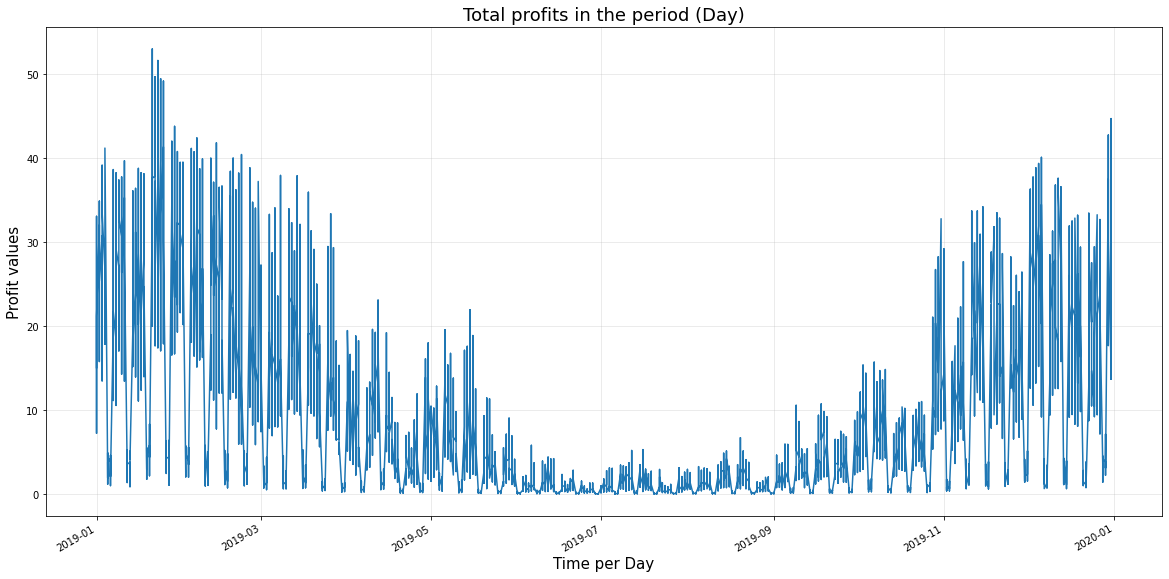


**************************************************************************
**            Congrats, your dataset has been processed                 **
**************************************************************************



In [26]:
# Preprocess the dataset

ds_f, target_var, col_names = process_training_data(df_copy, Date_col, Cat_col, Col_norm, Target_col)


In [27]:
# Display the preprocessed data
display(ds_f)

,mkt_id,output_own_price,output_own_cost,output_comp_price,output_X,output_own_share,output_own_sales
Date,,,,,,,
2019-01-01,0,7.05,5.90,7.11,0.4280,0.515267,13.100000
2019-01-02,0,7.05,6.05,7.11,0.3614,0.557082,24.309999
2019-01-03,0,7.05,5.98,7.28,0.3434,0.579922,28.770000
2019-01-04,0,7.05,5.98,7.28,0.3632,0.542767,18.850000
2019-01-05,0,6.79,6.07,6.68,0.4406,0.494757,1.710000
...,...,...,...,...,...,...,...
2019-12-27,53,7.28,5.96,7.30,0.3668,0.515118,19.750000
2019-12-28,53,6.69,5.94,6.64,0.3434,0.497312,4.960000
2019-12-29,53,6.69,5.91,6.64,0.3200,0.424593,4.350000


In [25]:
# Display the target variable

display(target_var)

Date
2019-01-01    15.065000
2019-01-02    24.309999
2019-01-03    30.783911
2019-01-04    20.169500
2019-01-05     1.231200
                ...    
2019-12-27    26.070000
2019-12-28     3.720000
2019-12-29     3.393001
2019-12-30    31.561199
2019-12-31    22.816500
Name: output_own_profits, Length: 19710, dtype: float32

In [28]:
# Check the dataset after the preprocessing
check_df(ds_f)

♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥ Shape ♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥
(19710, 7)
♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥ Types ♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥
mkt_id                 int32
output_own_price     float32
output_own_cost      float32
output_comp_price    float32
output_X             float32
output_own_share     float32
output_own_sales     float32
dtype: object
♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥ Head ♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥♥
            mkt_id  output_own_price  output_own_cost  output_comp_price  \
Date                                                                       
2019-01-01       0              7.05             5.90               7.11   
2019-01-02       0              7.05             6.05               7.11   
2019-01-03       0              7.05             5.98               7.28   
2019-01-04       0              7.05             5.98               7.28   
2019-01-05       0              6.79             6.07               6.68   

            output_X  output_own_share  output_own_sales  
Date                                 

count    19710.00000
mean        26.50000
std         15.58618
min          0.00000
5%           2.00000
10%          5.00000
20%         10.00000
30%         16.00000
40%         21.00000
50%         26.50000
60%         32.00000
70%         37.00000
80%         43.00000
90%         48.00000
95%         51.00000
99%         53.00000
max         53.00000
Name: mkt_id, dtype: float64


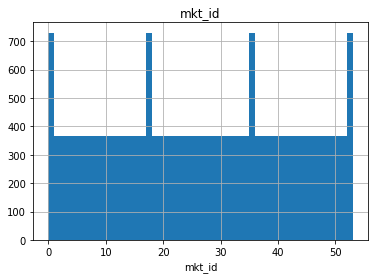

count    19710.000000
mean         7.002017
std          0.202630
min          6.560000
5%           6.670000
10%          6.700000
20%          6.750000
30%          6.940000
40%          7.000000
50%          7.040000
60%          7.070000
70%          7.120000
80%          7.180000
90%          7.250000
95%          7.300000
99%          7.380000
max          7.550000
Name: output_own_price, dtype: float64


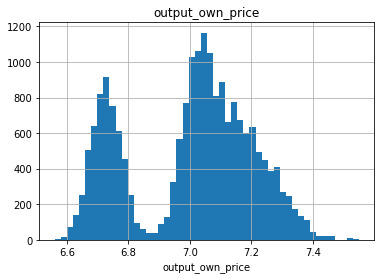

count    19710.000000
mean         5.999675
std          0.049680
min          5.790000
5%           5.920000
10%          5.940000
20%          5.960000
30%          5.970000
40%          5.990000
50%          6.000000
60%          6.010000
70%          6.030000
80%          6.040000
90%          6.060000
95%          6.080000
99%          6.120000
max          6.230000
Name: output_own_cost, dtype: float64


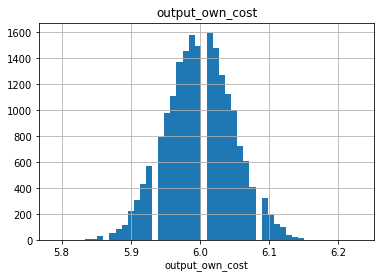

count    19710.000000
mean         7.003128
std          0.200832
min          6.560000
5%           6.680000
10%          6.710000
20%          6.750000
30%          6.940000
40%          7.000000
50%          7.040000
60%          7.070000
70%          7.120000
80%          7.180000
90%          7.250000
95%          7.310000
99%          7.380000
max          7.510000
Name: output_comp_price, dtype: float64


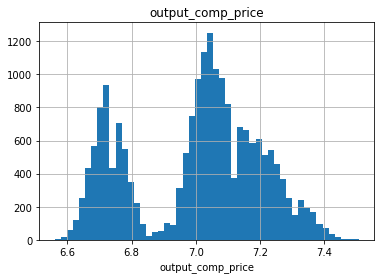

count    19710.000000
mean         0.527186
std          0.149101
min          0.246200
5%           0.321800
10%          0.336200
20%          0.383000
30%          0.411800
40%          0.455000
50%          0.514400
60%          0.563000
70%          0.617000
80%          0.680000
90%          0.741200
95%          0.780800
99%          0.842000
max          0.928400
Name: output_X, dtype: float64


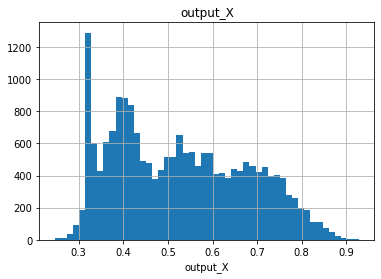

count    19710.000000
mean         0.499905
std          0.077973
min          0.193445
5%           0.368829
10%          0.400721
20%          0.436942
30%          0.461637
40%          0.481672
50%          0.500003
60%          0.518340
70%          0.539078
80%          0.562633
90%          0.599138
95%          0.628441
99%          0.686624
max          0.800825
Name: output_own_share, dtype: float64


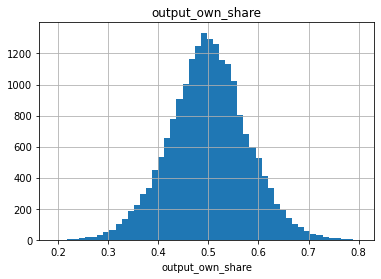

count    19710.000000
mean         7.293428
std          7.854675
min          0.020000
5%           0.140000
10%          0.320000
20%          0.790000
30%          1.420000
40%          2.400000
50%          3.800000
60%          5.830000
70%          9.800000
80%         15.040000
90%         20.000000
95%         23.680000
99%         28.290001
max         36.080002
Name: output_own_sales, dtype: float64


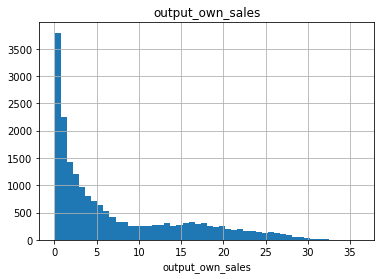

In [29]:
# Get more infos about the data

#num_cols = [col for col in col_names if col not in "Id"]
for col in col_names:
    num_summary(ds_f, col, plot=True)

Parameters currently in use:

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 0.6548663751977097,
 'gamma': 0.8014646438281954,
 'importance_type': 'gain',
 'learning_rate': 0.06459168917213459,
 'max_delta_step': 0,
 'max_depth': 8,
 'min_child_weight': 1,
 'missing': None,
 'n_estimators': 150,
 'n_jobs': 1,
 'nthread': None,
 'objective': 'reg:squarederror',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': None,
 'silent': None,
 'subsample': 0.6587137821013362,
 'tree_method': 'gpu_hist',
 'verbosity': 1}

**************************************************************************
**************************************************************************

These are the price/profit predictions of the model during training:
 [5.538718  5.7852516 1.2452352 ... 0.005916  4.729705  4.066777 ]

**************************************************************************
**            Plot

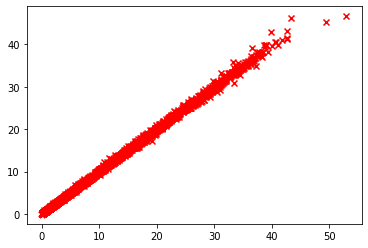


**************************************************************************
**              Display the average error distribution                  **
**************************************************************************



/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


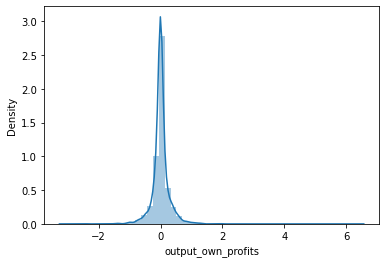


**************************************************************************
**            Evaluation metrics of the current model                   **
**************************************************************************

MAE of the current model: 0.16545294
MSE of the current model: 0.09613802
RMSE of the current model: 0.31006134


In [30]:
# Next Train the model
trained_model = train_model(XGBR_est, ds_f, target_var)

In [ ]:
# Please choose your new data and the new target variable and then run the following code
# 'class_col': define the target col of the new dataset (if available)

predict_price(trained_model, new_ds, class_col ,Target_col)

# 3) Hyper-Tuning the models

A model hyperparameter is a configuration that is external to the model and whose value cannot be estimated from the data and a model parameter is a configuration variable that is internal to the model and whose value can be estimated from the given data. In other words, a hyperparameter is used to construct the structure of the model and cannot be learned from the data and its value is set before the learning process begins. Therefore, hyperparameters are like the settings of an algorithm that can be adjusted to optimize performance and prevent overfitting.

There are two frequently used methods to perform hyperparameter tunning called 1) Grid Search and 2) Random Search. In this notebook, I have used the former one because of its simplicity to implement and at the same time, its powerful performance. Check this [link](https://scikit-learn.org/stable/modules/grid_search.html#) for further infos.


### - Upload and preprocess the dataset

In [2]:
# Import the necessary packages
#import cupy as cp
#from hummingbird.ml import convert,load


import pandas as pd
import numpy as np
import random as rd
from pprint import pprint
import multiprocessing

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

from sklearn import preprocessing, metrics
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import make_scorer, mean_squared_error

from cuml.svm import SVR 
from cuml.linear_model import LinearRegression, ElasticNet
from cuml.ensemble import RandomForestRegressor

from xgboost import XGBRegressor as xgb_reg
import xgboost as xgb


# from cuml.model_selection import train_test_split | You can use this one instead the sklearn command


# Use the following command to set num of jobs 
n_jobs = multiprocessing.cpu_count()-1



########## Load the dataset

data_url = "/content/output_data.csv"
df = pd.read_csv(data_url)# Additional features: index_col='output_date', parse_dates=['output_date']
df_copy = df.copy()

# Rename the date column into 'Date' instead of 'output_date'
df_copy.rename(columns={'output_date': 'Date'}, inplace = True)

# Set the date column as the index column
df_copy["Date"] = pd.to_datetime(df_copy["Date"])
df_copy.set_index("Date", drop=True, inplace=True)

# Copy the target column and then drop it
Y = df_copy['output_own_profits'].copy()
df_copy_X = df_copy.drop('output_own_profits', axis=1)

# Display the head and tail of the data
col_names = df_copy_X.columns

df_copy_X

,mkt_id,output_own_price,output_own_cost,output_comp_price,output_X,output_own_share,output_own_sales
Date,,,,,,,
2019-01-01,44,7.05,5.90,7.11,42.80,0.515267,13.10
2019-01-02,44,7.05,6.05,7.11,36.14,0.557082,24.31
2019-01-03,44,7.05,5.98,7.28,34.34,0.579922,28.77
2019-01-04,44,7.05,5.98,7.28,36.32,0.542767,18.85
2019-01-05,44,6.79,6.07,6.68,44.06,0.494757,1.71
...,...,...,...,...,...,...,...
2019-12-27,15555,7.28,5.96,7.30,36.68,0.515118,19.75
2019-12-28,15555,6.69,5.94,6.64,34.34,0.497312,4.96
2019-12-29,15555,6.69,5.91,6.64,32.00,0.424593,4.35


In [3]:
# Transform the categorical column "Market ID: mkt_id" into another form of labelling
## PS: I found 54 markets instead 55 markets

lb_make = preprocessing.LabelEncoder()
df_copy_X['mkt_id'] = lb_make.fit_transform(df_copy_X['mkt_id'])
df_copy_X.tail()

,mkt_id,output_own_price,output_own_cost,output_comp_price,output_X,output_own_share,output_own_sales
Date,,,,,,,
2019-12-27,53,7.28,5.96,7.30,36.68,0.515118,19.75
2019-12-28,53,6.69,5.94,6.64,34.34,0.497312,4.96
2019-12-29,53,6.69,5.91,6.64,32.00,0.424593,4.35
2019-12-30,53,7.31,5.99,7.42,31.10,0.465712,23.91
2019-12-31,53,7.28,6.05,7.20,32.00,0.440597,18.55


In [4]:
# Apply normalization technique for the "output_X" column only. 
# Because the others have the same units (or you forgot to mention this information), except the 'output_own_share' column that already normalized.
Col_norm = 'output_X'
df_copy_X[Col_norm] = df_copy_X[Col_norm] / 100
  
# View normalized data  
display(df_copy_X)

,mkt_id,output_own_price,output_own_cost,output_comp_price,output_X,output_own_share,output_own_sales
Date,,,,,,,
2019-01-01,0,7.05,5.90,7.11,0.4280,0.515267,13.10
2019-01-02,0,7.05,6.05,7.11,0.3614,0.557082,24.31
2019-01-03,0,7.05,5.98,7.28,0.3434,0.579922,28.77
2019-01-04,0,7.05,5.98,7.28,0.3632,0.542767,18.85
2019-01-05,0,6.79,6.07,6.68,0.4406,0.494757,1.71
...,...,...,...,...,...,...,...
2019-12-27,53,7.28,5.96,7.30,0.3668,0.515118,19.75
2019-12-28,53,6.69,5.94,6.64,0.3434,0.497312,4.96
2019-12-29,53,6.69,5.91,6.64,0.3200,0.424593,4.35


In [ ]:
# Convert data type into float32

df_copy_X = df_copy_X.astype(np.float32)  #Or np.array(df_copy_X, dtype=np.float32)
Y = Y.astype(np.float32)   # Or use np.array(Y, dtype=np.float32)

In [ ]:
# Split the dataset for the hyper-tuning section

X_train, X_test, y_train, y_test = train_test_split(df_copy_X, Y, test_size=0.2, random_state=0)

In [10]:
####### OPTIONAL
# Ensure data is Fortran ordered
X_train, X_test, y_train_dup, y_test = map(np.asfortranarray,
                                               [X_train, X_test, y_train, y_test])

# Move to GPU
cu_X_train, cu_X_test, cu_y_train, cu_y_test = map(cp.asarray,
                                                           [X_train, X_test, y_train, y_test])
cp.cuda.Stream().synchronize()

## Train the best results found



In [ ]:

from sklearn.ensemble import GradientBoostingRegressor

#from xgboost import XGBRegressor

#GBR_est = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=1, random_state=0, loss='ls').fit(X_train, y_train)

#XGBR_est = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=1, random_state=0, loss='ls').fit(X_train, y_train)

GBR_est = GradientBoostingRegressor().fit(X_train, y_train)


> #### For comparasion perposes: 
I will use best model and its parameters found from the proposed models. 


In [ ]:
# Define the XGBoost model:
xgb_gp = {'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 0.6548663751977097,
 'gamma': 0.8014646438281954,
 'importance_type': 'gain',
 'learning_rate': 0.06459168917213459,
 'max_delta_step': 0,
 'max_depth': 8,
 'min_child_weight': 1,
 'missing': None,
 'n_estimators': 150,
 'n_jobs': 1,
 'nthread': None,
 'objective': 'reg:squarederror',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': None,
 'silent': None,
 'subsample': 0.6587137821013362,
 'tree_method': 'gpu_hist',
 'verbosity': 1}

XGBR_est = xgb.XGBRegressor(**xgb_gp).fit(X_train, y_train)
 

In [ ]:
# Make predictions to valide the model
predictions_GBR_est = GBR_est.predict(X_test)

predictions_xGBR_est = XGBR_est.predict(X_test)

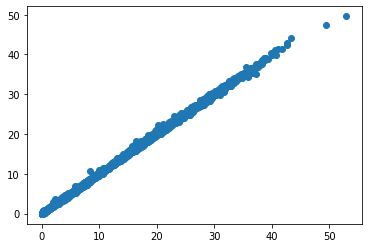

In [ ]:
# Plot the predicted value and the estimations

plt.plot(figsize=(14, 10))
plt.scatter(y_test, predictions_GBR_est)
plt.ylim()
plt.xlim()

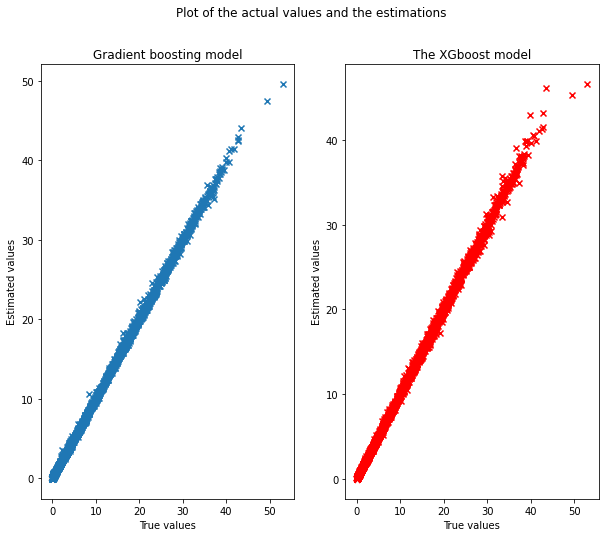

In [ ]:
#fig = plt.figure(figsize=(20, 14))
fig, (ax1, ax2) = plt.subplots(1, 2)

fig.suptitle('Plot of the actual values and the estimations')
ax1.scatter(y_test, predictions_GBR_est, marker= 'x')
ax1.set_title('Gradient boosting model')
ax1.set_xlabel("True values")
ax1.set_ylabel("Estimated values")

ax2.scatter(y_test, predictions_xGBR_est, c='red', marker= 'x')
ax2.set_title('The XGboost model')
ax2.set_xlabel("True values")
ax2.set_ylabel("Estimated values")

#ax.legend()
plt.gcf().set_size_inches((10, 8))
plt.show()

In [ ]:
# to ignore the warnings
#from warnings import filterwarnings

## Display the average error : Plot the distribution of the difference between the actual values and predictions

fig, axes = plt.subplots(1, 2, figsize=(15, 8), sharey=True)
fig.suptitle('The average error')

# Gradient boost model
sns.distplot((y_test-predictions_GBR_est),bins=50)
axes[0].set_title('Gradient boosting model')
axes[0].set_xlabel("True values")
axes[0].set_ylabel("Estimated values")

# Gradient boost model
sns.distplot((y_test-predictions_xGBR_est),bins=50 ) # color ='red', bins = 30  hue='target', kind='kde', fill=True, palette=sns.color_palette('bright')[:3], height=5, aspect=1.5)
axes[1].set_title('The XGboost model')
axes[1].set_xlabel("True values")
axes[1].set_ylabel("Estimated values")


sns.set(rc={"figure.figsize": (8, 4)});


In [ ]:
print("*********** Metrics evaluations for Gradient boosting model **********")

print("MAE:", metrics.mean_absolute_error(y_test, predictions_GBR_est))
print('MSE:', metrics.mean_squared_error(y_test, predictions_GBR_est))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions_GBR_est)))

*********** Metrics evaluations for Gradient boosting model **********
MAE: 0.14679414579578368
MSE: 0.05752263670749183
RMSE: 0.239838772319014


In [ ]:
print("*********** Metrics evaluations for eXtreme Gradient boosting model **********")

print("MAE:", metrics.mean_absolute_error(y_test, predictions_xGBR_est))
print('MSE:', metrics.mean_squared_error(y_test, predictions_xGBR_est))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions_xGBR_est)))

*********** Metrics evaluations for eXtreme Gradient boosting model **********
MAE: 0.16545294
MSE: 0.09613802
RMSE: 0.31006134


> **The obtained results can interpreted as follow:**

*   First of all the Gradient boosting model is not tuned which makes it unreliable and it is not robust for other data that have diversity.
*   Although, the evaluations metrices of XGboost model are greater than the gradient model. I suggest to use the XGBoost model.
* Among the proposed algorithms, it seems that the gradient boosting algorithms perfom well on this kind of dataset. 



## H-tuning parameters section

***Grid search*** is commonly used as an approach to hyper-parameter tuning that will methodically build and evaluate a model for each combination of algorithm parameters specified in a grid. [GridSearchCV](https://scikit-learn.org/stable/modules/grid_search.html#) helps us combine an estimator with a grid search preamble to tune hyper-parameters.

> ### SVM reg tuning
[Support vector regression (SVR)](https://heartbeat.comet.ml/support-vector-regression-in-python-using-scikit-learn-89cc18e933b7) is a statistical method that examines the linear relationship between two continuous variables. In regression problems, the aim is to find a line that best fits the data provided. The equation of the line in its simplest form is described as below `y=mx +c`. It is similar in the case of regression using a support vector machine, but with a slight change. Here a small error value *e* is used (error = prediction - actual). The value of *e* determines the width of the error tube (also called insensitive tube). The value of *e* determines the number of support vectors, and a smaller *e* value indicates a lower tolerance for error. Hence, the support vector regression model depends only on a subset of the training data points, as the cost function of the model ignores any training data close to the model prediction when the error is less than *e*.

You can utilize [cuML](https://docs.rapids.ai/api/cuml/stable/api.html#cuml.svm.SVR) to construct an SVC regressor for training and predictions with GPU.





In [ ]:
################### Hyper-tunning for SVM regressor

# Define the base model

base_svr = SVR()

# If you want to use your custom score function, specify the function and use it. 
def my_rmse_loss_func(y_true, y_pred):
    return np.sqrt(mean_squared_error((y_true, y_pred)))
     

scorer = make_scorer(mean_squared_error, greater_is_better=False)#,, squared = False



param_grid_svr = {'C': [0.0001, 0.01, 0.1, 0.9,1, 1.1, 2,3], # I used 10, 100 
              'gamma': ['scale', 'auto'], 
              'kernel': ['poly','rbf',  'sigmoid', 'precomputed','linear'], #, 
              'epsilon': [0.01, 0.1, 0.2 ,0.22, 0.3, 1]}
pprint(param_grid_svr)

{'C': [0.0001, 0.01, 0.1, 0.9, 1, 1.1, 2, 3],
 'epsilon': [0.01, 0.1, 0.2, 0.22, 0.3, 1],
 'gamma': ['scale', 'auto'],
 'kernel': ['poly', 'rbf', 'sigmoid', 'precomputed', 'linear']}


In [ ]:
# Create a GridSearchCV object and fit it to the training data

svr_gs_cu = GridSearchCV(base_svr,param_grid_svr, n_jobs = -1 , # Use 4
                        scoring=, cv=3  ,verbose=3 ,return_train_score =True  ) # ,refit=True , 'neg_mean_squared_error'



# Train the model in GPU

svr_gs_cu.fit(X_train,y_train)


# print best parameter after tuning
svr_gs_cu.best_params_

#'''
# Converting scikit-learn model to PyTorch on CPU

#svr_gs_pytorch = convert(svr_gs, 'torch')

# Switching PyTorch from CPU to GPU
#%%capture 
#svr_gs_pytorch.to('cuda')
#'''

Fitting 3 folds for each of 375 candidates, totalling 1125 fits
[CV 1/3] END C=0.01, epsilon=0.01, gamma=1, kernel=linear;, score=(train=-121.183, test=-120.953) total time=   1.7s
[CV 3/3] END C=0.01, epsilon=0.01, gamma=1, kernel=linear;, score=(train=-121.442, test=-121.467) total time=   0.5s
[CV 2/3] END C=0.01, epsilon=0.01, gamma=1, kernel=poly;, score=(train=-121.926, test=-122.568) total time=   0.5s
[CV 1/3] END C=0.01, epsilon=0.01, gamma=1, kernel=rbf;, score=(train=-121.183, test=-120.953) total time=   0.5s
[CV 3/3] END C=0.01, epsilon=0.01, gamma=1, kernel=rbf;, score=(train=-121.442, test=-121.467) total time=   0.5s
[CV 2/3] END C=0.01, epsilon=0.01, gamma=1, kernel=sigmoid;, score=(train=-121.926, test=-122.568) total time=   0.5s
[CV 1/3] END C=0.01, epsilon=0.01, gamma=1, kernel=precomputed;, score=(train=-121.183, test=-120.953) total time=   0.5s
[CV 3/3] END C=0.01, epsilon=0.01, gamma=1, kernel=precomputed;, score=(train=-121.442, test=-121.467) total time=   0.

{'C': 1, 'epsilon': 0.1, 'gamma': 0.001, 'kernel': 'linear'}

In [ ]:
# Create a GridSearchCV object and fit it to the training data without cross validation

svr_gs_cuN = GridSearchCV(base_svr,param_grid_svr, n_jobs = -1 , # Use 4
                        scoring='neg_mean_squared_error'  ,verbose=3 ,return_train_score =True  ) # ,refit=True mean_squared_error,



# Train the model in GPU

svr_gs_cuN.fit(X_train,y_train)


# print best parameter after tuning
svr_gs_cuN.best_params_

#'''
# Converting scikit-learn model to PyTorch on CPU

#svr_gs_pytorch = convert(svr_gs, 'torch')

# Switching PyTorch from CPU to GPU
#%%capture 
#svr_gs_pytorch.to('cuda')
#'''

Fitting 5 folds for each of 375 candidates, totalling 1875 fits

[CV 1/3] END C=1, epsilon=0.3, gamma=0.1, kernel=precomputed;, score=(train=-2.295, test=-2.431) total time=   0.6s
[CV 3/3] END C=1, epsilon=0.3, gamma=0.1, kernel=precomputed;, score=(train=-2.157, test=-2.231) total time=   0.6s
[CV 2/3] END C=1, epsilon=0.3, gamma=0.01, kernel=linear;, score=(train=-1.109, test=-1.321) total time=   0.4s
[CV 1/3] END C=1, epsilon=0.3, gamma=0.01, kernel=poly;, score=(train=-1.156, test=-1.080) total time=   0.4s
[CV 3/3] END C=1, epsilon=0.3, gamma=0.01, kernel=poly;, score=(train=-1.120, test=-1.122) total time=   0.4s
[CV 2/3] END C=1, epsilon=0.3, gamma=0.01, kernel=rbf;, score=(train=-1.109, test=-1.321) total time=   0.5s
[CV 1/3] END C=1, epsilon=0.3, gamma=0.01, kernel=sigmoid;, score=(train=-1.156, test=-1.080) total time=   0.4s
[CV 3/3] END C=1, epsilon=0.3, gamma=0.01, kernel=sigmoid;, score=(train=-1.120, test=-1.122) total time=   0.4s
[CV 2/3] END C=1, epsilon=0.3, gamma

{'C': 1, 'epsilon': 0.2, 'gamma': 0.001, 'kernel': 'linear'}

In [ ]:
# Create a GridSearchCV object and fit it to the training data with 7 cv

svr_cv = GridSearchCV(base_svr,param_grid_svr, n_jobs = -1 , # Use 4
                         scoring='neg_mean_squared_error', cv = 7 ,verbose=3 ,return_train_score =True  ) # ,refit=True mean_squared_error, scoring='neg_mean_squared_error' ,



# Train the model in GPU

svr_cv.fit(X_train,y_train)


# print best parameter after tuning
svr_cv.best_params_

#'''
# Converting scikit-learn model to PyTorch on CPU

#svr_gs_pytorch = convert(svr_gs, 'torch')

# Switching PyTorch from CPU to GPU
#%%capture 
#svr_gs_pytorch.to('cuda')
#'''

Fitting 7 folds for each of 480 candidates, totalling 3360 fits


{'C': 3, 'epsilon': 0.22, 'gamma': 'scale', 'kernel': 'poly'}

In [ ]:
# print how our model looks after hyper-parameter tuning

best_svrR = svr_gs_cu.best_estimator_
print(best_svrR)
print(svr_gs_cu.best_score_)
print(svr_gs_cu.best_index_)
print(svr_gs_cu.best_params_)

SVR()
0.9890751972580009
290
{'C': 1, 'epsilon': 0.1, 'gamma': 0.001, 'kernel': 'linear'}


In [ ]:
# print how our model looks after hyper-parameter tuning
print("******** For 7 CV ********")
best_svrR = svr_cv.best_estimator_
print(best_svrR)
print(svr_cv.best_score_)
print(svr_cv.best_index_)
print(svr_cv.best_params_)

******** For 7 CV ********
SVR()
-0.9013312290946247
450
{'C': 3, 'epsilon': 0.22, 'gamma': 'scale', 'kernel': 'poly'}


In [ ]:
# Re-train the model with the best params

#best_param = svr_gs_cu.get_params()
#best_param_svr = {'C': 100, 'epsilon': 0.01, 'gamma': 0.01, 'kernel': 'linear'}
svr_cu= SVR(**svr_cv.best_params_)
svr_cu.fit(X_train, y_train)

# Look at parameters used by the tuned model

print('Parameters currently in use:\n')
#print(svr_gs_cu.get_params())
print(svr_cu.get_params())

Parameters currently in use:

{'handle': <pylibraft.common.handle.Handle object at 0x7fc77400e900>, 'verbose': 4, 'output_type': 'input', 'C': 3, 'kernel': 'poly', 'degree': 3, 'gamma': 'scale', 'coef0': 0.0, 'tol': 0.001, 'cache_size': 1024.0, 'max_iter': -1, 'nochange_steps': 1000, 'epsilon': 0.22}


In [ ]:
# Predictions
## By using the re-trained model
predictions_RF_regr_tuned= svr_cu.predict(X_test)

## Or by using the best estimator directly

#predictions_RF_regr_tuned= best_svrR.predict(X_test)


In [ ]:
print("*********** Metrics evaluations for SVM regressor model **********")

print("MAE:", metrics.mean_absolute_error(y_test, predictions_RF_regr_tuned))
print('MSE:', metrics.mean_squared_error(y_test, predictions_RF_regr_tuned))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions_RF_regr_tuned)))

*********** Metrics evaluations for SVM regressor model **********
MAE: 0.41228413992257285
MSE: 0.5182283150288441
RMSE: 0.7198807644525892


(-2.6382605000000003, 55.6806705)

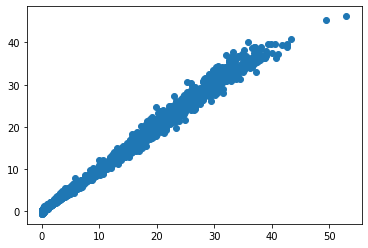

In [ ]:
# Plot the estimations and the actual values

plt.plot(figsize=(14, 10))
plt.scatter(y_test, predictions_RF_regr_tuned)
plt.ylim()
plt.xlim()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


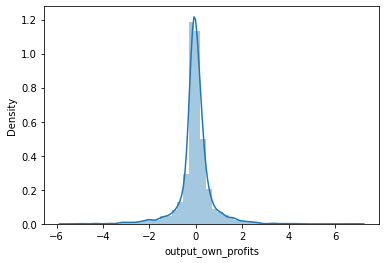

In [ ]:
# Display the average error : The distribustion of the differences between the actual vales and the predicted ones 

sns.distplot((y_test-predictions_RF_regr_tuned),bins=50)

### Random Forest regressor model

A [random forest regressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html): A random forest is a meta estimator that fits a number of classifying decision trees on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. The sub-sample size is controlled with the max_samples parameter if bootstrap=True (default), otherwise the whole dataset is used to build each tree.

You can utilize [cuML](https://docs.rapids.ai/api/cuml/stable/api.html#cuml.ensemble.RandomForestRegressor) to implements a Random Forest regressor model using GPU, which fits multiple decision trees in an ensemble.



In [ ]:
################ Hyper-tunning for Random Forest regressor

# Parameters grid search which results in (2 * 2 * 4 * 3 * 3 * 6)*cv=864*3 settings.

param_grid3 = {
    #'split_criterion': ['mse', 'poisson', 'gamma', 'inverse_gaussian'],
    'bootstrap': [True, False],
    'max_depth': [16, 30, 50 ],
    'max_features': ['auto', 'sqrt', 'log2'],
    'min_samples_leaf': [1, 3, 4],
    #'min_samples_split': [2,4, 8, 10, 12],
    'n_estimators': [100, 200, 300, 400 ,500]} # 1000
    


# You can use these too if you want to expand the space search 
param_grid2 = {
    'split_criterion': ['mse', 'poisson', 'gamma', 'inverse_gaussian'],
    'bootstrap': [True, False],
    'max_depth': [16, 30, 50, 80, 90, 100 ],
    'max_features': ['auto', 'sqrt', 'log2'],
    'min_samples_leaf': [1, 3, 4, 5],
    'min_samples_split': [2,4, 8, 10, 12],
    'n_estimators': [100, 200, 300, 400 ,500], # 1000
    }
pprint(param_grid2)

print("The grid parameters that I used for test:")
pprint(param_grid3)

{'bootstrap': [True, False],
 'max_depth': [16, 30, 50, 80, 90, 100],
 'max_features': ['auto', 'sqrt', 'log2'],
 'min_samples_leaf': [1, 3, 4, 5],
 'min_samples_split': [2, 4, 8, 10, 12],
 'n_estimators': [100, 200, 300, 400, 500]}
For test:
{'bootstrap': [True, False],
 'max_depth': [16, 30, 50],
 'max_features': ['auto', 'sqrt', 'log2'],
 'min_samples_leaf': [1, 3, 4],
 'n_estimators': [100, 200, 300, 400, 500]}


In [ ]:
# Create a based model
rfr_cu = RandomForestRegressor() # remove the output_type. Check this link for more details: https://docs.rapids.ai/api/cuml/stable/api.html#output-data-type-configuration

# Instantiate the grid search model
rfr_tune_cu = GridSearchCV(estimator = rfr_cu, param_grid = param_grid3, #scoring=scorer_rfr,  
                           cv = 5, n_jobs = -1, verbose = 3, return_train_score =True )


In [ ]:
# Fit the grid search to the data
rfr_tune_cu.fit(X_train, y_train)

Fitting 5 folds for each of 270 candidates, totalling 1350 fits


/usr/local/lib/python3.8/dist-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True, False], 'max_depth': [16, 30, 50],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 3, 4],
                         'n_estimators': [100, 200, 300, 400, 500]},
             return_train_score=True, verbose=3)

In [ ]:
# print how our model looks after hyper-parameter tuning
best_param_rfr = rfr_tune_cu.best_params_
best_rfr = rfr_tune_cu.best_estimator_
print(best_rfr)
print(rfr_tune_cu.best_score_)
print(rfr_tune_cu.best_index_)
print(rfr_tune_cu.best_params_)
pprint(best_param_rfr)


RandomForestRegressor()
0.9989593625068665
48
{'bootstrap': True, 'max_depth': 30, 'max_features': 'auto', 'min_samples_leaf': 1, 'n_estimators': 400}
{'bootstrap': True,
 'max_depth': 30,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'n_estimators': 400}


In [ ]:
pd.DataFrame(rfr_tune_cu.cv_results_).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_bootstrap,param_max_depth,param_max_features,param_min_samples_leaf,param_n_estimators,params,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,2.364125,1.572843,0.545400,0.072104,True,16,auto,1,100,"{'bootstrap': True, 'max_depth': 16, 'max_feat...",...,0.998928,0.000120,27,0.999863,0.999856,0.999860,0.999860,0.999849,0.999857,0.000005
1,2.521995,1.481926,1.152310,0.211458,True,16,auto,1,200,"{'bootstrap': True, 'max_depth': 16, 'max_feat...",...,0.998951,0.000112,12,0.999866,0.999858,0.999862,0.999864,0.999854,0.999861,0.000004
2,2.268552,0.193984,0.663550,0.077453,True,16,auto,1,300,"{'bootstrap': True, 'max_depth': 16, 'max_feat...",...,0.998958,0.000110,6,0.999864,0.999857,0.999864,0.999867,0.999856,0.999862,0.000005
3,4.295435,1.484208,0.863082,0.095266,True,16,auto,1,400,"{'bootstrap': True, 'max_depth': 16, 'max_feat...",...,0.998959,0.000115,3,0.999866,0.999857,0.999865,0.999869,0.999857,0.999863,0.000005
4,4.809867,1.528470,1.102917,0.113812,True,16,auto,1,500,"{'bootstrap': True, 'max_depth': 16, 'max_feat...",...,0.998957,0.000117,9,0.999865,0.999858,0.999865,0.999869,0.999858,0.999863,0.000005


In [ ]:
# Re-train the model with the best params

best_param_rfr = rfr_tune_cu.get_params()

rfr_cu= RandomForestRegressor(**rfr_tune_cu.best_params_)
rfr_cu.fit(X_train, y_train)

# Look at parameters used by the tuned model

print('Parameters currently in use:\n')
pprint(rfr_cu.get_params())

Parameters currently in use:

{'accuracy_metric': 'r2',
 'bootstrap': True,
 'class_weight': None,
 'criterion': None,
 'dtype': dtype('float32'),
 'handle': <pylibraft.common.handle.Handle object at 0x7f172601e5a0>,
 'max_batch_size': 4096,
 'max_depth': 30,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_leaves': -1,
 'max_samples': 1.0,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': None,
 'n_bins': 128,
 'n_estimators': 400,
 'n_jobs': None,
 'n_streams': 4,
 'oob_score': None,
 'output_type': 'input',
 'random_state': None,
 'split_criterion': 2,
 'verbose': 4,
 'warm_start': None}


In [ ]:
# Predictions
## By using the re-trained model
predictions_rfr_cu= rfr_cu.predict(X_test)

## Or by using the best estimator directly

#predictions_rfr_cu= best_rfr.predict(X_test)


In [ ]:
print("*********** Metrics evaluations for Random Forest regressor model **********")

print("MAE:", metrics.mean_absolute_error(y_test, predictions_rfr_cu))
print('MSE:', metrics.mean_squared_error(y_test, predictions_rfr_cu))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions_rfr_cu)))

*********** Metrics evaluations for Random Forest regressor model **********
MAE: 0.12532626
MSE: 0.10270597
RMSE: 0.32047772


(-2.638260592939332, 55.68067245208658)

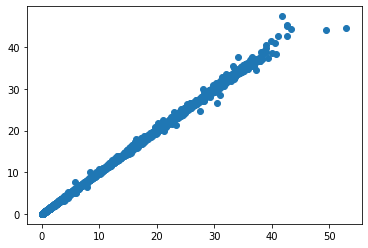

In [ ]:
# Plot the estimations and the actual values

plt.plot(figsize=(14, 10))
plt.scatter(y_test, predictions_rfr_cu)
plt.ylim()
plt.xlim()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


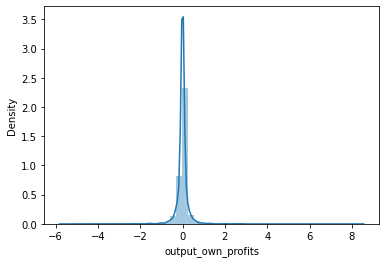

In [ ]:
# Display the average error : The distribustion of the differences between the actual vales and the predicted ones 

sns.distplot((y_test-predictions_rfr_cu),bins=50)

### Linear regressor model

LinearRegression is a simple machine learning model where the response y is modelled by a linear combination of the predictors in X.

[cuML’s LinearRegression](https://docs.rapids.ai/api/cuml/stable/api.html#cuml.LinearRegression) expects either a cuDF DataFrame or a NumPy matrix and provides 2 algorithms SVD and Eig to fit a linear model. SVD is more stable, but Eig (default) is much faster.

In [ ]:
################ Hyper-tunning for Linear regressor

# Create a based model
lr_cu = LinearRegression()

In [ ]:
# Parameters grid search which results in (2 * 2 * 4 * 3 * 3 * 6)*cv=864*3 settings.
param_grid_lr = {
    "fit_intercept": [True, False],
    "algorithm": ['svd', 'eig', 'qr', 'svd-qr', 'svd-jacobi'],
    "normalize": [True, False] 
}

pprint(param_grid_lr)


{'algorithm': ['svd', 'eig', 'qr', 'svd-qr', 'svd-jacobi'],
 'fit_intercept': [True, False],
 'normalize': [True, False]}


In [ ]:
# Instantiate the grid search model

lr_tune_cu = GridSearchCV(estimator = lr_cu, param_grid = param_grid_lr, #scoring=scorer_rfr,  
                           cv = 5, n_jobs = 1, verbose = 3)



In [ ]:
# Fit the grid search to the data
lr_tune_cu.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END algorithm=svd, fit_intercept=True, normalize=True;, score=0.990 total time=   0.0s
[CV 2/5] END algorithm=svd, fit_intercept=True, normalize=True;, score=0.991 total time=   0.0s
[CV 3/5] END algorithm=svd, fit_intercept=True, normalize=True;, score=0.990 total time=   0.0s
[CV 4/5] END algorithm=svd, fit_intercept=True, normalize=True;, score=0.990 total time=   0.0s
[CV 5/5] END algorithm=svd, fit_intercept=True, normalize=True;, score=0.990 total time=   0.0s
[CV 1/5] END algorithm=svd, fit_intercept=True, normalize=False;, score=0.990 total time=   0.0s
[CV 2/5] END algorithm=svd, fit_intercept=True, normalize=False;, score=0.991 total time=   0.0s
[CV 3/5] END algorithm=svd, fit_intercept=True, normalize=False;, score=0.990 total time=   0.0s
[CV 4/5] END algorithm=svd, fit_intercept=True, normalize=False;, score=0.990 total time=   0.0s
[CV 5/5] END algorithm=svd, fit_intercept=True, normalize=False;, scor

GridSearchCV(cv=5, estimator=LinearRegression(), n_jobs=1,
             param_grid={'algorithm': ['svd', 'eig', 'qr', 'svd-qr',
                                       'svd-jacobi'],
                         'fit_intercept': [True, False],
                         'normalize': [True, False]},
             verbose=3)

In [ ]:
# print how our model looks after hyper-parameter tuning

print("******************")
best_param = lr_tune_cu.best_params_
best_lr = lr_tune_cu.best_estimator_
print(best_lr)
print(lr_tune_cu.best_score_)
print(lr_tune_cu.best_index_)
print("Best params of Linear regression:")
pprint(best_param)

print("******************")
pprint(lr_tune_cu.get_params())

******************
LinearRegression()
0.9903775095939636
0
Best params of Linear regression:
{'algorithm': 'svd', 'fit_intercept': True, 'normalize': True}
******************
{'cv': 5,
 'error_score': nan,
 'estimator': LinearRegression(),
 'estimator__algorithm': 'svd',
 'estimator__fit_intercept': True,
 'estimator__handle': <pylibraft.common.handle.Handle object at 0x7f0e8ffc6b10>,
 'estimator__normalize': False,
 'estimator__output_type': 'input',
 'estimator__verbose': 4,
 'n_jobs': 1,
 'param_grid': {'algorithm': ['svd', 'eig', 'qr', 'svd-qr', 'svd-jacobi'],
                'fit_intercept': [True, False],
                'normalize': [True, False]},
 'pre_dispatch': '2*n_jobs',
 'refit': True,
 'return_train_score': False,
 'scoring': None,
 'verbose': 3}


In [ ]:
# Represent the results as Dataframe

pd.DataFrame(lr_tune_cu.cv_results_).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algorithm,param_fit_intercept,param_normalize,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.006298,0.002100,0.001689,0.000334,svd,True,True,"{'algorithm': 'svd', 'fit_intercept': True, 'n...",0.990396,0.990789,0.990224,0.990269,0.990209,0.990378,0.000216,1
1,0.006055,0.001537,0.001905,0.000759,svd,True,False,"{'algorithm': 'svd', 'fit_intercept': True, 'n...",0.990396,0.990789,0.990224,0.990269,0.990209,0.990377,0.000216,6
2,0.005040,0.000900,0.001488,0.000070,svd,False,True,"{'algorithm': 'svd', 'fit_intercept': False, '...",0.989488,0.989840,0.989268,0.989499,0.989410,0.989501,0.000188,11
3,0.005638,0.001581,0.001812,0.000789,svd,False,False,"{'algorithm': 'svd', 'fit_intercept': False, '...",0.989488,0.989840,0.989268,0.989499,0.989410,0.989501,0.000188,11
4,0.006021,0.001264,0.001519,0.000069,eig,True,True,"{'algorithm': 'eig', 'fit_intercept': True, 'n...",0.990396,0.990789,0.990224,0.990269,0.990209,0.990378,0.000216,1


In [ ]:
# Re-train the model with the best params

best_param_lr = lr_tune_cu.get_params()
best_param = lr_tune_cu.best_params_
lr_cu= LinearRegression(**lr_tune_cu.best_params_)
lr_cu.fit(X_train, y_train)


# Look at parameters used by the tuned model

print('Parameters currently in use:\n')
pprint(lr_cu.get_params())

Parameters currently in use:

{'algorithm': 'svd',
 'fit_intercept': True,
 'handle': <pylibraft.common.handle.Handle object at 0x7f0e8f412630>,
 'normalize': True,
 'output_type': 'input',
 'verbose': 4}


In [ ]:
# Predictions
## By using the re-trained model
predictions_lr_cu= lr_cu.predict(X_test)

## Or by using the best estimator directly

#predictions_lr_cu= best_lr.predict(X_test)

In [ ]:
print("*********** Metrics evaluations for Linear regressor model **********")

print("MAE:", metrics.mean_absolute_error(y_test, predictions_lr_cu))
print('MSE:', metrics.mean_squared_error(y_test, predictions_lr_cu))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions_lr_cu)))

*********** Metrics evaluations for Linear regressor model **********
MAE: 0.68071926
MSE: 0.92147326
RMSE: 0.959934


(-2.638260592939332, 55.68067245208658)

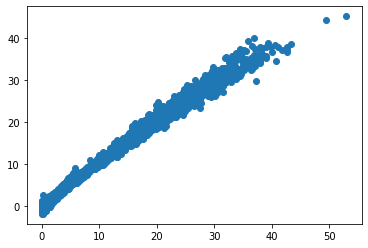

In [ ]:
# Plot the estimations and the actual values

plt.plot(figsize=(14, 10))
plt.scatter(y_test, predictions_lr_cu)
plt.ylim()
plt.xlim()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


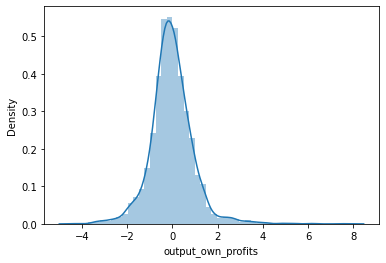

In [ ]:
# Display the average error : The distribustion of the differences between the actual vales and the predicted ones 

sns.distplot((y_test-predictions_lr_cu),bins=50)

### ElasticNet Regression model

ElasticNet extends LinearRegression with combined L1 and L2 regularizations on the coefficients when predicting response y with a linear combination of the predictors in X. It can reduce the variance of the predictors, force some coefficients to be small, and improves the conditioning of the problem.

[cuML’s ElasticNet](https://docs.rapids.ai/api/cuml/stable/api.html#cuml.ElasticNet) an array-like object or cuDF DataFrame, uses coordinate descent to fit a linear model.

In [ ]:
################ Hyper-tunning for ElasticNet Regression

# Create a based model

enet = ElasticNet()

In [ ]:
# Parameters grid search which results in (2 * 2 * 4 * 3 * 3 * 6)*cv=864*3 settings.
param_grid_enet = {
    "fit_intercept": [True, False],
    "alpha": [0.5, 1, 1.5, 2, 3],
    "normalize": [True, False],
    "l1_ratio": [0.2, 0.5, 0.7, 0.9]   ,
    "max_iter": [700, 1000, 1200, 1500],
    #"solver": ['cd', 'qn'],
    "selection": ['random']
}

pprint(param_grid_enet)


{'alpha': [0.5, 1, 1.5, 2, 3],
 'fit_intercept': [True, False],
 'l1_ratio': [0.2, 0.5, 0.7, 0.9],
 'max_iter': [700, 1000, 1200, 1500],
 'normalize': [True, False],
 'selection': ['random']}


In [ ]:
# Instantiate the grid search model

enet_cu = GridSearchCV(estimator = enet, param_grid = param_grid_enet, #scoring=scorer_rfr,  
                           cv = 5, n_jobs = 1, verbose = 3)



In [ ]:
# Fit the grid search to the data
enet_cu.fit(X_train, y_train)

Fitting 5 folds for each of 320 candidates, totalling 1600 fits
[CV 1/5] END alpha=0.5, fit_intercept=True, l1_ratio=0.2, max_iter=700, normalize=True, selection=random;, score=0.921 total time=   0.0s
[CV 2/5] END alpha=0.5, fit_intercept=True, l1_ratio=0.2, max_iter=700, normalize=True, selection=random;, score=0.924 total time=   0.0s
[CV 3/5] END alpha=0.5, fit_intercept=True, l1_ratio=0.2, max_iter=700, normalize=True, selection=random;, score=0.921 total time=   0.0s
[CV 4/5] END alpha=0.5, fit_intercept=True, l1_ratio=0.2, max_iter=700, normalize=True, selection=random;, score=0.923 total time=   0.0s
[CV 5/5] END alpha=0.5, fit_intercept=True, l1_ratio=0.2, max_iter=700, normalize=True, selection=random;, score=0.925 total time=   0.0s
[CV 1/5] END alpha=0.5, fit_intercept=True, l1_ratio=0.2, max_iter=700, normalize=False, selection=random;, score=0.986 total time=   0.0s
[CV 2/5] END alpha=0.5, fit_intercept=True, l1_ratio=0.2, max_iter=700, normalize=False, selection=random;,

GridSearchCV(cv=5, estimator=ElasticNet(), n_jobs=1,
             param_grid={'alpha': [0.5, 1, 1.5, 2, 3],
                         'fit_intercept': [True, False],
                         'l1_ratio': [0.2, 0.5, 0.7, 0.9],
                         'max_iter': [700, 1000, 1200, 1500],
                         'normalize': [True, False], 'selection': ['random']},
             verbose=3)

In [ ]:
# print how our model looks after hyper-parameter tuning

print("******************")
best_param_enet = enet_cu.best_params_
best_enet_cu = enet_cu.best_estimator_
print(best_enet_cu)
print(enet_cu.best_score_)
print(enet_cu.best_index_)
print("Best params of ElasticNet Regression:")
pprint(best_param_enet)

print("******************")
pprint(enet_cu.get_params())

******************
ElasticNet()
0.9860005736351013
25
Best params of Linear regression:
{'alpha': 0.5,
 'fit_intercept': True,
 'l1_ratio': 0.9,
 'max_iter': 700,
 'normalize': False,
 'selection': 'random'}
******************
{'cv': 5,
 'error_score': nan,
 'estimator': ElasticNet(),
 'estimator__alpha': 1.0,
 'estimator__fit_intercept': True,
 'estimator__handle': <pylibraft.common.handle.Handle object at 0x7f0e8ef30c30>,
 'estimator__l1_ratio': 0.5,
 'estimator__max_iter': 1000,
 'estimator__normalize': False,
 'estimator__output_type': 'input',
 'estimator__selection': 'cyclic',
 'estimator__solver': 'cd',
 'estimator__tol': 0.001,
 'estimator__verbose': 4,
 'n_jobs': 1,
 'param_grid': {'alpha': [0.5, 1, 1.5, 2, 3],
                'fit_intercept': [True, False],
                'l1_ratio': [0.2, 0.5, 0.7, 0.9],
                'max_iter': [700, 1000, 1200, 1500],
                'normalize': [True, False],
                'selection': ['random']},
 'pre_dispatch': '2*n_jobs',
 're

In [ ]:
# Represent the results as Dataframe

pd.DataFrame(enet_cu.cv_results_).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,param_fit_intercept,param_l1_ratio,param_max_iter,param_normalize,param_selection,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.006685,0.002479,0.002036,0.000737,0.5,True,0.2,700,True,random,"{'alpha': 0.5, 'fit_intercept': True, 'l1_rati...",0.921219,0.924141,0.921164,0.923075,0.924570,0.922834,0.001427,181
1,0.003966,0.000069,0.001635,0.000207,0.5,True,0.2,700,False,random,"{'alpha': 0.5, 'fit_intercept': True, 'l1_rati...",0.985942,0.986314,0.985905,0.985909,0.985852,0.985984,0.000167,17
2,0.005317,0.000080,0.001680,0.000170,0.5,True,0.2,1000,True,random,"{'alpha': 0.5, 'fit_intercept': True, 'l1_rati...",0.921219,0.924141,0.921164,0.923075,0.924570,0.922834,0.001427,181
3,0.004011,0.000187,0.001572,0.000196,0.5,True,0.2,1000,False,random,"{'alpha': 0.5, 'fit_intercept': True, 'l1_rati...",0.985942,0.986314,0.985905,0.985909,0.985852,0.985984,0.000167,17
4,0.005536,0.000234,0.001709,0.000207,0.5,True,0.2,1200,True,random,"{'alpha': 0.5, 'fit_intercept': True, 'l1_rati...",0.921219,0.924141,0.921164,0.923075,0.924570,0.922834,0.001427,181


In [ ]:
# Re-train the model with the best params

best_param_enet = enet_cu.get_params()
best_param = enet_cu.best_params_
enet_c= ElasticNet(**enet_cu.best_params_)
enet_c.fit(X_train, y_train)


# Look at parameters used by the tuned model

print('Parameters currently in use:\n')
pprint(enet_c.get_params())

Parameters currently in use:

{'alpha': 0.5,
 'fit_intercept': True,
 'handle': <pylibraft.common.handle.Handle object at 0x7f0e8eb31960>,
 'l1_ratio': 0.9,
 'max_iter': 700,
 'normalize': False,
 'output_type': 'input',
 'selection': 'random',
 'solver': 'cd',
 'tol': 0.001,
 'verbose': 4}


In [ ]:
# Predictions
## By using the re-trained model
predictions_enet_cu= enet_c.predict(X_test)

## Or by using the best estimator directly

#predictions_lr_cu= best_lr.predict(X_test)

In [ ]:
print("*********** Metrics evaluations for ElasticNet regressor model **********")

print("MAE:", metrics.mean_absolute_error(y_test, predictions_enet_cu))
print('MSE:', metrics.mean_squared_error(y_test, predictions_enet_cu))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions_enet_cu)))

*********** Metrics evaluations for ElasticNet regressor model **********
MAE: 0.78176194
MSE: 1.314847
RMSE: 1.1466677


(-2.638260592939332, 55.68067245208658)

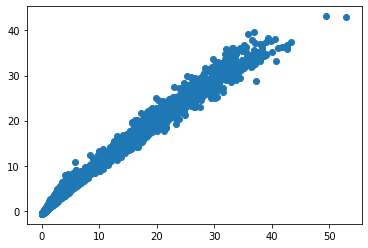

In [ ]:
# Plot the estimations and the actual values

plt.plot(figsize=(14, 10))
plt.scatter(y_test, predictions_enet_cu)
plt.ylim()
plt.xlim()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


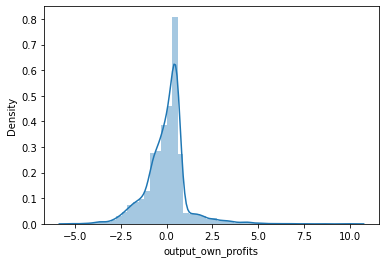

In [ ]:
# Display the average error : The distribustion of the differences between the actual vales and the predicted ones 

sns.distplot((y_test-predictions_enet_cu),bins=50)

### Extreme Gradient boosting model
[XGBoost](https://towardsdatascience.com/https-medium-com-vishalmorde-xgboost-algorithm-long-she-may-rein-edd9f99be63d) is a decision-tree-based ensemble Machine Learning algorithm that uses a gradient boosting framework. In prediction problems involving unstructured data (images, text, etc.) artificial neural networks tend to outperform all other algorithms or frameworks. However, when it comes to small-to-medium structured/tabular data, decision tree based algorithms are considered best-in-class right now. Please see the chart below for the evolution of tree-based algorithms over the years.

In this task, I used the [XGBoost package](https://xgboost.readthedocs.io/en/stable/index.html) to implement the model and benefit from the GPU. XGBoost package is an optimized distributed gradient boosting library designed to be highly efficient, flexible and portable. It implements machine learning algorithms under the Gradient Boosting framework. XGBoost provides a parallel tree boosting (also known as GBDT, GBM) that solve many data science problems in a fast and accurate way. The same code runs on major distributed environment (Hadoop, SGE, MPI) and can solve problems beyond billions of examples.

> For more details about the algorithm, check this [blog](https://www.enjoyalgorithms.com/blog/xg-boost-algorithm-in-ml/).

![image.png](https://miro.medium.com/max/720/1*QJZ6W-Pck_W7RlIDwUIN9Q.webp)


In [ ]:
################ Hyper-tunning for XGBoost regressor

# Specify sufficient boosting iterations to reach a minimum
num_round = 3000


# Leave most parameters as default
param = {'objective': 'multi:softmax', # Specify multiclass classification
         'num_class': 8, # Number of possible output classes
         'tree_method': 'gpu_hist' # Use GPU accelerated algorithm
         }

In [ ]:
# Convert input data from numpy to XGBoost format
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

In [ ]:
display(dtrain)

In [ ]:
gpu_res = {} # Store accuracy result
tmp = time.time()
# Train model
xgb_reg.train(param, dtrain, num_round, evals=[(dtest, 'test')], evals_result=gpu_res)
print("GPU Training Time: %s seconds" % (str(time.time() - tmp)))


# Or you can use 
xgb_reg.fit(X_train, y_train)

In [ ]:
# For tuning the H-parameters

xgb_model = xgb.XGBRegressor(objective= "reg:squarederror" )

# Create the parameter grid:

param_xgb = {
    "colsample_bytree": [rd.uniform(0.7, 0.3) for i in range(5)], # default 1
    #"objective": "reg:squarederror", 
    "gamma": [rd.uniform(0.5, 1) for i in range(5)], # default 0
    "learning_rate": [rd.uniform(1e-4, 1e-1) for i in range(4)], # default 0.1 
    "max_depth": [rd.randint(6,10) for i in range(3)], # default 6
    "n_estimators": [rd.randint(100, 150) for i in range(8)], # default 100
    "subsample": [rd.uniform(0.5, 1) for i in range(6)], # default 1
    'tree_method': ['gpu_hist'] # Use GPU accelerated algorithm
}

print("*********** The grid parameters: **************")
pprint(param_xgb)

*********** The grid parameters: **************
{'colsample_bytree': [0.6335615282839618,
                      0.3804341572108511,
                      0.5798085205489374,
                      0.4177201003426624,
                      0.6130222373034],
 'gamma': [0.7807801179755964,
           0.8364490242759262,
           0.7375075790156587,
           0.6639650636394352,
           0.9913507214532666],
 'learning_rate': [0.054263264583820865,
                   0.033262784280464947,
                   0.06444566567484462,
                   0.09531703133175512],
 'max_depth': [7, 6, 7],
 'n_estimators': [100, 118, 107, 123, 125, 139, 134, 131],
 'subsample': [0.9299290506312416,
               0.64593636594371,
               0.9817681249429401,
               0.7998755621451462,
               0.6910313648993814,
               0.8151122795006447],
 'tree_method': ['gpu_hist']}


In [ ]:
# The first params used : 
param_xgb1 = {'colsample_bytree': [0.4216420662689534,
                      0.6548663751977097,
                      0.35890682733859897,
                      0.5306045259195141,
                      0.6456245840392845],
 'gamma': [0.8014646438281954,
           0.6958437067080201,
           0.585644964342793,
           0.620660530235271,
           0.6632229152454181],
 'learning_rate': [0.06459168917213459,
                   0.011132025049516945,
                   0.020516829491686393,
                   0.042890776303271705],
 'max_depth': [6, 6, 6],
 'n_estimators': [136, 133, 106, 138, 139, 118, 103, 116],
 'subsample': [0.8738183685808502,
               0.7459021578279758,
               0.9659727324914016,
               0.6587137821013362,
               0.9011533337583371,
               0.7824397295572335],
 'tree_method': ['gpu_hist']}


xgb_paramtest = {'colsample_bytree': [0.4216420662689534,
                      0.6548663751977097,
                      0.35890682733859897],
 'gamma': [0.8014646438281954,
           0.6958437067080201,
           0.585644964342793],
 'learning_rate': [0.06459168917213459,
                   0.011132025049516945,
                   0.020516829491686393,
                   0.042890776303271705],
 'max_depth': [5, 8, 9],
 'n_estimators': [110,120, 140, 150],
 'subsample': [0.8738183685808502,
               0.7459021578279758,
               0.9659727324914016,
               0.6587137821013362],
 'tree_method': ['gpu_hist']}



# I used this due to the lack of computation power. You can use any of the previous parameters.

xgb_paramtest1 = {'colsample_bytree': [0.4216420662689534,
                      0.6548663751977097],
 'gamma': [0.8014646438281954,
           0.585644964342793],
 'learning_rate': [0.06459168917213459,
                   0.011132025049516945,
                   0.042890776303271705],
 'max_depth': [5, 8, 9],
 'n_estimators': [110,120, 140, 150],
 'subsample': [0.9659727324914016,
               0.6587137821013362],
 'tree_method': ['gpu_hist']}


print("*********** The first grid parameters: **************")
pprint(xgb_paramtest1)

*********** The first grid parameters: **************
{'colsample_bytree': [0.4216420662689534, 0.6548663751977097],
 'gamma': [0.8014646438281954, 0.585644964342793],
 'learning_rate': [0.06459168917213459,
                   0.011132025049516945,
                   0.042890776303271705],
 'max_depth': [5, 8, 9],
 'n_estimators': [110, 120, 140, 150],
 'subsample': [0.9659727324914016, 0.6587137821013362],
 'tree_method': ['gpu_hist']}


In [ ]:
# Use grid search to tune the params

xgb_search = GridSearchCV(xgb_model, xgb_paramtest1, scoring='neg_mean_squared_error', #scoring=scorer_rfr, 
                        cv=5, verbose=3, n_jobs=1, return_train_score=True)




In [ ]:
# Train the model

xgb_search.fit(X_train, y_train)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
[CV 1/5] END colsample_bytree=0.4216420662689534, gamma=0.8014646438281954, learning_rate=0.06459168917213459, max_depth=5, n_estimators=110, subsample=0.9659727324914016, tree_method=gpu_hist;, score=(train=-0.429, test=-0.538) total time=   1.2s
[CV 2/5] END colsample_bytree=0.4216420662689534, gamma=0.8014646438281954, learning_rate=0.06459168917213459, max_depth=5, n_estimators=110, subsample=0.9659727324914016, tree_method=gpu_hist;, score=(train=-0.430, test=-0.544) total time=   0.7s
[CV 3/5] END colsample_bytree=0.4216420662689534, gamma=0.8014646438281954, learning_rate=0.06459168917213459, max_depth=5, n_estimators=110, subsample=0.9659727324914016, tree_method=gpu_hist;, score=(train=-0.428, test=-0.604) total time=   0.7s
[CV 4/5] END colsample_bytree=0.4216420662689534, gamma=0.8014646438281954, learning_rate=0.06459168917213459, max_depth=5, n_estimators=110, subsample=0.9659727324914016, tree_method=gpu_hist

GridSearchCV(cv=5, estimator=XGBRegressor(objective='reg:squarederror'),
             n_jobs=1,
             param_grid={'colsample_bytree': [0.4216420662689534,
                                              0.6548663751977097],
                         'gamma': [0.8014646438281954, 0.585644964342793],
                         'learning_rate': [0.06459168917213459,
                                           0.011132025049516945,
                                           0.042890776303271705],
                         'max_depth': [5, 8, 9],
                         'n_estimators': [110, 120, 140, 150],
                         'subsample': [0.9659727324914016, 0.6587137821013362],
                         'tree_method': ['gpu_hist']},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=3)

In [ ]:
# print how our model looks after hyper-parameter tuning

best_xgb = xgb_search.best_estimator_
print(best_xgb)
print(xgb_search.best_score_)
print(xgb_search.best_index_)

XGBRegressor(colsample_bytree=0.6548663751977097, gamma=0.8014646438281954,
             learning_rate=0.06459168917213459, max_depth=8, n_estimators=150,
             objective='reg:squarederror', subsample=0.6587137821013362,
             tree_method='gpu_hist')
-0.08665489703416825
159


In [ ]:
print("best score: {0}, best iteration: {1}".format(xgb_search.best_score_, xgb_search.best_index_))

best score: -0.08665489703416825, best iteration: 159


In [ ]:
# Represent the results as Dataframe

pd.DataFrame(xgb_search.cv_results_).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_colsample_bytree,param_gamma,param_learning_rate,param_max_depth,param_n_estimators,param_subsample,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.812832,0.171160,0.002560,0.000644,0.421642,0.801465,0.064592,5,110,0.965973,...,-0.553299,0.028343,125,-0.428916,-0.430401,-0.428487,-0.425122,-0.429732,-0.428532,0.001828
1,0.725630,0.001273,0.002045,0.000037,0.421642,0.801465,0.064592,5,110,0.658714,...,-0.562022,0.031425,129,-0.434353,-0.442820,-0.444263,-0.443401,-0.445277,-0.442023,0.003924
2,0.788692,0.003062,0.002075,0.000059,0.421642,0.801465,0.064592,5,120,0.965973,...,-0.516437,0.027054,115,-0.392632,-0.396174,-0.395920,-0.390691,-0.394679,-0.394019,0.002083
3,0.811556,0.021034,0.002467,0.000361,0.421642,0.801465,0.064592,5,120,0.658714,...,-0.524781,0.028528,117,-0.396730,-0.409232,-0.409166,-0.408719,-0.411104,-0.406990,0.005195
4,0.922645,0.021053,0.002224,0.000097,0.421642,0.801465,0.064592,5,140,0.965973,...,-0.415564,0.019752,101,-0.301629,-0.305583,-0.305511,-0.301722,-0.305590,-0.304007,0.001904


In [ ]:
# Re-train the model with the best params

best_param_xgb = xgb_search.get_params()

xgb_cu=  xgb.XGBRegressor(objective= "reg:squarederror", **xgb_search.best_params_ )

xgb_cu.fit(X_train, y_train)




Parameters currently in use:

{'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bynode': 1, 'colsample_bytree': 0.6548663751977097, 'gamma': 0.8014646438281954, 'importance_type': 'gain', 'learning_rate': 0.06459168917213459, 'max_delta_step': 0, 'max_depth': 8, 'min_child_weight': 1, 'missing': None, 'n_estimators': 150, 'n_jobs': 1, 'nthread': None, 'objective': 'reg:squarederror', 'random_state': 0, 'reg_alpha': 0, 'reg_lambda': 1, 'scale_pos_weight': 1, 'seed': None, 'silent': None, 'subsample': 0.6587137821013362, 'verbosity': 1, 'tree_method': 'gpu_hist'}


In [ ]:
# Look at parameters used by the tuned model

print('Parameters currently in use:\n')
pprint(xgb_cu.get_params())

Parameters currently in use:

{'base_score': 0.5,
 'booster': 'gbtree',
 'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 0.6548663751977097,
 'gamma': 0.8014646438281954,
 'importance_type': 'gain',
 'learning_rate': 0.06459168917213459,
 'max_delta_step': 0,
 'max_depth': 8,
 'min_child_weight': 1,
 'missing': None,
 'n_estimators': 150,
 'n_jobs': 1,
 'nthread': None,
 'objective': 'reg:squarederror',
 'random_state': 0,
 'reg_alpha': 0,
 'reg_lambda': 1,
 'scale_pos_weight': 1,
 'seed': None,
 'silent': None,
 'subsample': 0.6587137821013362,
 'tree_method': 'gpu_hist',
 'verbosity': 1}


In [ ]:
# Predictions
## By using the re-trained model
predictions_xgb_cu= xgb_cu.predict(X_test)

## Or by using the best estimator directly

#predictions_xgb_cu= best_xgb.predict(X_test)

In [ ]:
print("*********** Metrics evaluations for XGBoost model **********")

print("MAE:", metrics.mean_absolute_error(y_test, predictions_xgb_cu))
print('MSE:', metrics.mean_squared_error(y_test, predictions_xgb_cu))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions_xgb_cu)))

*********** Metrics evaluations for XGBoost model **********
MAE: 0.16545294
MSE: 0.09613802
RMSE: 0.31006134


(-2.638260592939332, 55.68067245208658)

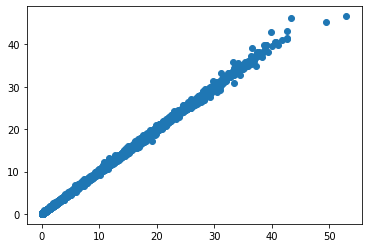

In [ ]:
# Plot the estimations and the actual values

plt.plot(figsize=(14, 10))
plt.scatter(y_test, predictions_xgb_cu)
plt.ylim()
plt.xlim()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


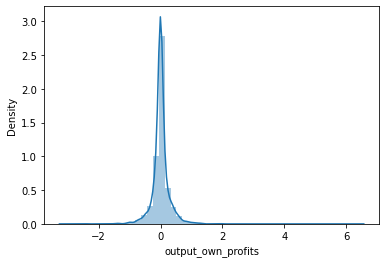

In [ ]:
# Display the average error : The distribustion of the differences between the actual vales and the predicted one


sns.distplot((y_test-predictions_xgb_cu),bins=50)

> ## The Long Short-Term Memory layer (LSTM) model

Long Short Term Memory networks – usually just called “LSTMs” – are a special kind of Recurrent Neural Network (RNN), capable of learning long-term dependencies. They were introduced by Hochreiter & Schmidhuber (1997), and were refined and popularized by many people, and are now widely used.

LSTMs are explicitly designed to avoid the long-term dependency problem. Remembering information for long periods of time is practically their default behavior, not something they struggle to learn!

All recurrent neural networks have the form of a chain of repeating modules of neural network. In standard RNNs, this repeating module will have a very simple structure, such as a single tanh layer.

LSTMs also have this chain like structure, but the repeating module has a different structure. Instead of having a single neural network layer, there are four, interacting in a very special way.

> For more details about the algorithm, check this [blog](http://colah.github.io/posts/2015-08-Understanding-LSTMs/).


In [5]:
# Import the libraries

import os
import tensorflow as tf
from tensorflow.keras.models import Sequential
#from keras.layers import 
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import Dense, LSTM, Dropout

from tensorflow.keras.metrics import RootMeanSquaredError, MeanAbsoluteError
from tensorflow.keras.optimizers import Adam

import itertools

from timeit import default_timer as timer


In [ ]:
# TPU initialization

resolver = tf.distribute.cluster_resolver.TPUClusterResolver(tpu='')
tf.config.experimental_connect_to_cluster(resolver)
# This is the TPU initialization code that has to be at the beginning.
tf.tpu.experimental.initialize_tpu_system(resolver)
print("All devices: ", tf.config.list_logical_devices('TPU'))

All devices:  [LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:0', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:1', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:2', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:3', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:4', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:5', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:6', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:7', device_type='TPU')]


In [ ]:
# First, You have to explicitly ask to use a TPU in the code. 
# It’s different between Colab and an actual GCP Cloud TPU, so care must be taken.


#Get a handle to the attached TPU. On GCP it will be the CloudTPU itself
resolver = tf.distribute.cluster_resolver.TPUClusterResolver(tpu='grpc://' + os.environ['COLAB_TPU_ADDR'])
#Connect to the TPU handle and initialise it
tf.config.experimental_connect_to_cluster(resolver)
tf.tpu.experimental.initialize_tpu_system(resolver)

print("All devices: ", tf.config.list_logical_devices('TPU'))



All devices:  [LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:0', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:1', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:2', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:3', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:4', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:5', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:6', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:7', device_type='TPU')]


In [ ]:
#Next, set the distribution strategy
strategy = tf.distribute.TPUStrategy(resolver)



In [ ]:
# After the necessary library installation is completed, you’ll need to perform the following TPU addressing process:

try:
  device_name = os.environ['COLAB_TPU_ADDR']
  TPU_ADDRESS = 'grpc://' + device_name
  print('Found TPU at: {}'.format(TPU_ADDRESS))

except KeyError:
  print('TPU not found')

In [6]:
# Convert data type into float32
df_lstm = df_copy_X.copy()
Y_lstm = Y.copy()


df_lstm = df_lstm.astype(np.float32)  #Or np.array(df_copy_X, dtype=np.float32)
Y_lstm = Y_lstm.astype(np.float32)   # Or use np.array(Y, dtype=np.float32)


# Convert the market id into int32

df_lstm['mkt_id']= df_lstm['mkt_id'].astype(np.int32) 

In [7]:
#Normalize the data
  #It is important to scale features before training a neural network. Normalization is a common way of doing this scaling: subtract the mean and divide by the standard deviation of each feature.

  #The mean and standard deviation should only be computed using the training data so that the models have no access to the values in the validation and test sets.

'''
train_mean = train_df.mean()
train_std = train_df.std()

train_df = (train_df - train_mean) / train_std
val_df = (val_df - train_mean) / train_std
test_df = (test_df - train_mean) / train_std
'''

'\ntrain_mean = train_df.mean()\ntrain_std = train_df.std()\n\ntrain_df = (train_df - train_mean) / train_std\nval_df = (val_df - train_mean) / train_std\ntest_df = (test_df - train_mean) / train_std\n'

In [8]:
# Or use these commands to preprocess the inputs for the lstm model

from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()

column_names_to_normalize = ['output_own_price',	'output_own_cost',	'output_comp_price',	'output_own_sales']
x = df_lstm[column_names_to_normalize].values
x_scaled = min_max_scaler.fit_transform(x)
df_temp = pd.DataFrame(x_scaled, columns=column_names_to_normalize, index = df_lstm.index)
df_lstm[column_names_to_normalize] = df_temp

In [9]:
df_lstm

,mkt_id,output_own_price,output_own_cost,output_comp_price,output_X,output_own_share,output_own_sales
Date,,,,,,,
2019-01-01,0,0.494949,0.250001,0.578948,0.4280,0.515267,0.362729
2019-01-02,0,0.494949,0.590910,0.578948,0.3614,0.557082,0.673600
2019-01-03,0,0.494949,0.431819,0.757895,0.3434,0.579922,0.797282
2019-01-04,0,0.494949,0.431819,0.757895,0.3632,0.542767,0.522185
2019-01-05,0,0.232323,0.636364,0.126316,0.4406,0.494757,0.046866
...,...,...,...,...,...,...,...
2019-12-27,53,0.727273,0.386364,0.778947,0.3668,0.515118,0.547144
2019-12-28,53,0.131313,0.340910,0.084210,0.3434,0.497312,0.136994
2019-12-29,53,0.131313,0.272727,0.084210,0.3200,0.424593,0.120078


In [ ]:
print(len(df_lstm))

19710


In [ ]:
n = len(df_lstm)
print(len(df_lstm[0:int(n*0.9)]))

17739


In [10]:
# split the dataset

#column_indices = {name: i for i, name in enumerate(df_lstm.columns)}

# data = np.array(df_lstm, dtype=np.float32)

n = len(df_lstm)
train_df = df_lstm[0:int(n*0.9)]
ylstm_train = Y_lstm[0:int(n*0.9)]
#val_df = df[int(n*0.7):int(n*0.9)]


num_features = df_lstm.shape[1]

print("Number of features:",num_features)

Number of features: 7


In [11]:
# For the test
test_df = df_lstm[int(n*0.9):]
ylstm_test = Y_lstm[int(n*0.9):]

print(ylstm_test)

Date
2019-08-08     0.959500
2019-08-09     1.247400
2019-08-10     0.085200
2019-08-11     0.102200
2019-08-12     1.302900
                ...    
2019-12-27    26.070000
2019-12-28     3.720000
2019-12-29     3.393001
2019-12-30    31.561199
2019-12-31    22.816500
Name: output_own_profits, Length: 1971, dtype: float32


In [12]:
# Split the dataset manually for the training phase

X_train, X_val, y_train, y_val = train_test_split(train_df, ylstm_train, test_size=0.2, random_state=0)

'''
In other cases, you can use the built-in parameter (validation_split) in the fit method of the Keras library. 
It considers a fraction of the training data as the validation set to evaluate loss and metrics at the end of each epoch as follow:

model.fit(train_X, train_y, validation_split=0.3) # automatically splitting
'''

'\nIn other cases, you can use the built-in parameter (validation_split) in the fit method of the Keras library. \nIt considers a fraction of the training data as the validation set to evaluate loss and metrics at the end of each epoch as follow:\n\nmodel.fit(train_X, train_y, validation_split=0.3) # automatically splitting\n'

In [13]:
# convert the data into array

X_train_ar = np.array(X_train)

X_val_ar = np.array(X_val)
y_train_ar =np.array(y_train)
y_val_ar = np.array(y_val)

# For the test set
test_df_ar = np.array(test_df)
ylstm_test_ar = np.array(ylstm_test)




In [14]:
display(X_train_ar)

array([[4.40000000e+01, 6.66666031e-01, 5.68181992e-01, ...,
        3.86599988e-01, 5.99123418e-01, 5.52689970e-01],
       [4.30000000e+01, 8.18181515e-01, 5.22727013e-01, ...,
        3.19999993e-01, 5.09481370e-01, 6.78036571e-01],
       [7.00000000e+00, 6.06060028e-01, 3.18181992e-01, ...,
        3.97399992e-01, 5.56485713e-01, 5.14975071e-01],
       ...,
       [2.60000000e+01, 1.91919327e-01, 4.54545021e-01, ...,
        3.90199989e-01, 3.41874301e-01, 4.38158624e-02],
       [2.90000000e+01, 1.61615849e-01, 5.00000954e-01, ...,
        6.27799988e-01, 6.04684830e-01, 8.59678350e-03],
       [7.00000000e+00, 4.94949341e-01, 4.54545021e-01, ...,
        7.91599989e-01, 5.08612871e-01, 1.41430935e-02]])

In [15]:
# Add Dataset.cache and Dataset.prefetch operations to reduce read latency while training the model:

X_train_ar = X_train_ar.cache().shuffle(1000).prefetch(tf.data.AUTOTUNE)
X_val_ar = X_val_ar.cache().prefetch(tf.data.AUTOTUNE)
test_df_ar = test_df_ar.cache().prefetch(tf.data.AUTOTUNE)

Index(['output_own_price', 'output_own_cost', 'output_comp_price', 'output_X',
       'output_own_share', 'output_own_sales'],
      dtype='object')


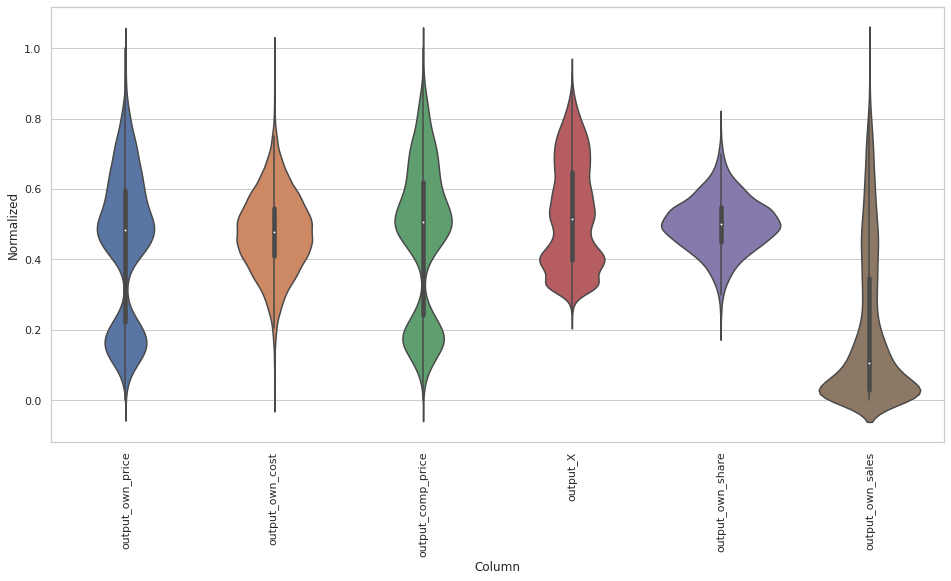

In [ ]:
# Display the distribution of the features. 
#plt.figure(figsize=(12, 6))
train_dfco = train_df.copy()
train_dfco = train_dfco.drop("mkt_id", axis = 1 )

Col_names = train_dfco.columns
print(Col_names)

train_dfco = train_dfco.melt(var_name='Column', value_name='Normalized')

sns.set(style = 'whitegrid')
ax = sns.violinplot(x='Column', y='Normalized', data=train_dfco)
_ = ax.set_xticklabels(Col_names, rotation=90)

plt.gcf().set_size_inches((16, 8))
plt.show()


In [ ]:
# Define the lstm model


def get_model(params, input_shape):
	#with strategy.scope(): If you want to benefit from the TPU
	model = Sequential()
	model.add(LSTM(units=params["lstm_units"], return_sequences=True, input_shape=(input_shape, 1)))
	model.add(Dropout(rate=params["dropout"]))

	model.add(LSTM(units=params["lstm_units"], return_sequences=True))
	model.add(Dropout(rate=params["dropout"]))

	model.add(LSTM(units=params["lstm_units"], return_sequences=True))
	model.add(Dropout(rate=params["dropout"]))

	model.add(LSTM(units=params["lstm_units"], return_sequences=False))
	model.add(Dropout(rate=params["dropout"]))

	model.add(Dense(1))

	model.compile(loss=params["loss"],
		              optimizer=params["optimizer"],
									metrics=[RootMeanSquaredError(), MeanAbsoluteError()])

	return model

#Then we instantiate a model with a given set of parameters. We use the past 90 observations in the time series as a sequence for the input to the model. 
# The other hyperparameters describe the architecture and the specific choices for training the model. 

params = {
	"loss": "mean_squared_error",
	"optimizer": "adam",
	"dropout": 0.3, # Values used in order: 0.2 , 0.5 , 0.9, 0.2, 
	"lstm_units": 80, #  Values used in order: 90, 120, 80
	"epochs": 50, #  Values used in order: 30, 40, 50
	"batch_size": 128,
	"es_patience" : 10 #Values used in order: 10, 15 
}

lstm_model = get_model(params=params, input_shape=num_features)

In [ ]:
# Display the summary of the model

lstm_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 7, 80)             26240     
                                                                 
 dropout (Dropout)           (None, 7, 80)             0         
                                                                 
 lstm_1 (LSTM)               (None, 7, 80)             51520     
                                                                 
 dropout_1 (Dropout)         (None, 7, 80)             0         
                                                                 
 lstm_2 (LSTM)               (None, 7, 80)             51520     
                                                                 
 dropout_2 (Dropout)         (None, 7, 80)             0         
                                                                 
 lstm_3 (LSTM)               (None, 80)                5

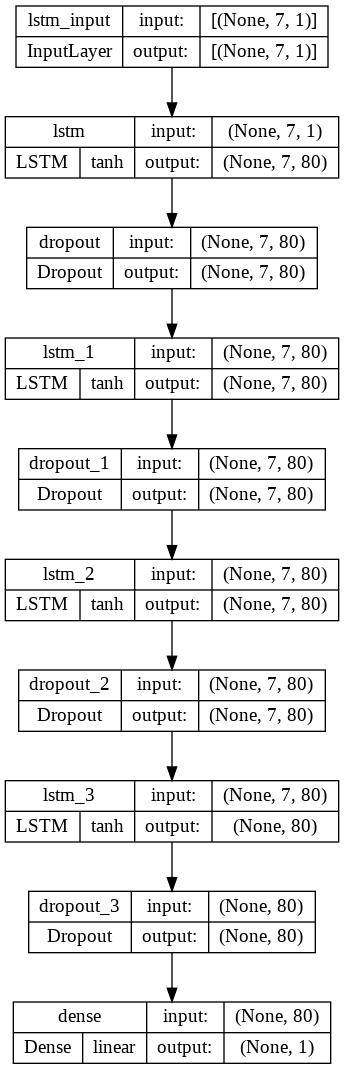

In [ ]:
# Plot the lstm architecture

plot_model(
lstm_model,
#to_file="model.png",
show_shapes=True,
show_dtype=False,
show_layer_names=True,
rankdir="TB",
expand_nested=True,
dpi=96,
layer_range=None,
show_layer_activations=True,


)

In [28]:
# Create a callback to implement early stopping i.e. to stop training the model if it yields no improvement on the validation dataset for a given number of epochs.

lstm_callback = tf.keras.callbacks.EarlyStopping(monitor='val_root_mean_squared_error',
                                           	mode='min', patience=params["es_patience"])

#The parameter es_patience refers to the number of epochs for early stopping.


In [ ]:
# Train the model

history = lstm_model.fit(
	X_train_ar,
	y_train_ar,
	validation_data=(X_val_ar, y_val_ar),
	epochs=params["epochs"],
	batch_size=params["batch_size"],
	verbose=1,
	callbacks=[lstm_callback]
)


Epoch 1/50
111/111 [==============================] - 15s 66ms/step - loss: 107.5815 - root_mean_squared_error: 10.3722 - mean_absolute_error: 8.2018 - val_loss: 102.7347 - val_root_mean_squared_error: 10.1358 - val_mean_absolute_error: 8.1394
Epoch 2/50
111/111 [==============================] - 6s 52ms/step - loss: 101.2336 - root_mean_squared_error: 10.0615 - mean_absolute_error: 8.2165 - val_loss: 102.1889 - val_root_mean_squared_error: 10.1089 - val_mean_absolute_error: 8.3609
Epoch 3/50
111/111 [==============================] - 6s 51ms/step - loss: 101.1856 - root_mean_squared_error: 10.0591 - mean_absolute_error: 8.2383 - val_loss: 102.3219 - val_root_mean_squared_error: 10.1154 - val_mean_absolute_error: 8.1516
Epoch 4/50
111/111 [==============================] - 6s 51ms/step - loss: 100.9344 - root_mean_squared_error: 10.0466 - mean_absolute_error: 8.1997 - val_loss: 101.4421 - val_root_mean_squared_error: 10.0718 - val_mean_absolute_error: 8.1324
Epoch 5/50
111/111 [=======

In [ ]:
# Training keys

history.history.keys()


dict_keys(['loss', 'root_mean_squared_error', 'mean_absolute_error', 'val_loss', 'val_root_mean_squared_error', 'val_mean_absolute_error'])

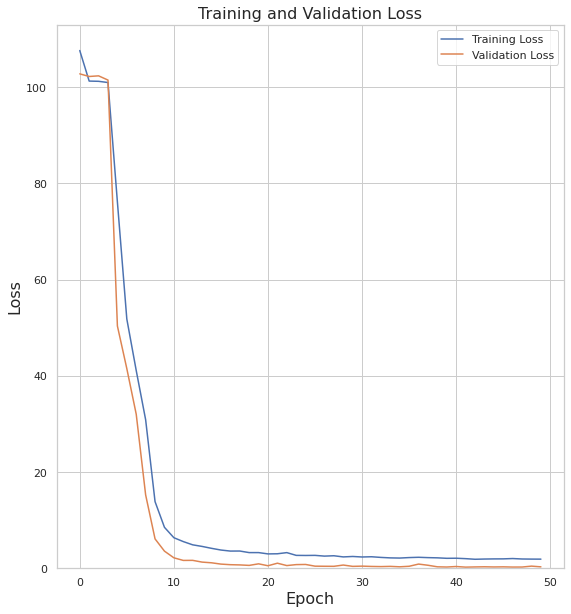

In [ ]:
# Plot the Train and validation loss

plt.figure(figsize=(20,5))
plt.subplot(1,2,2)
plt.plot(history.history["loss"],label="Training Loss")
plt.plot(history.history["val_loss"],label="Validation Loss")
plt.legend(loc="upper right")
plt.xlabel("Epoch",fontsize=16)
plt.ylabel("Loss",fontsize=16)
plt.ylim([0,max(plt.ylim())])
plt.title("Training and Validation Loss",fontsize=16)

plt.gcf().set_size_inches((20, 10))
plt.show()

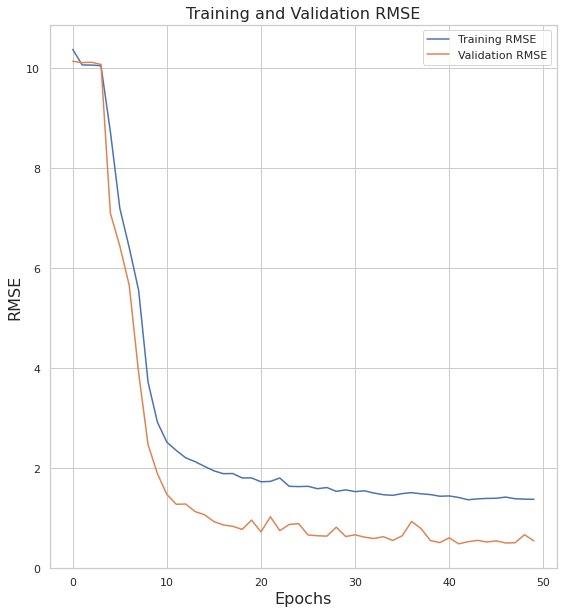

In [ ]:
# Plot the Train and validation RMSE 

#plt.figure(figsize=(20,5))
plt.subplot(1,2,2)
plt.plot(history.history["root_mean_squared_error"],label="Training RMSE")
plt.plot(history.history["val_root_mean_squared_error"],label="Validation RMSE")
plt.legend(loc="upper right")
plt.xlabel("Epochs",fontsize=16)
plt.ylabel("RMSE",fontsize=16)
plt.ylim([0,max(plt.ylim())])
plt.title("Training and Validation RMSE",fontsize=16)

plt.gcf().set_size_inches((20, 10))
plt.show()

In [ ]:
# Evaluate the results

results = lstm_model.evaluate(test_df_ar, ylstm_test_ar)
print("test loss, test acc:", np.round(results, 4))

62/62 [==============================] - 1s 15ms/step - loss: 0.2667 - root_mean_squared_error: 0.5165 - mean_absolute_error: 0.3805
test loss, test acc: [0.2667 0.5165 0.3805]


In [ ]:
# Predictions
## By using the trained model
lstm_pred= lstm_model.predict(test_df_ar)


#ylstm_test_ar

62/62 [==============================] - 2s 14ms/step


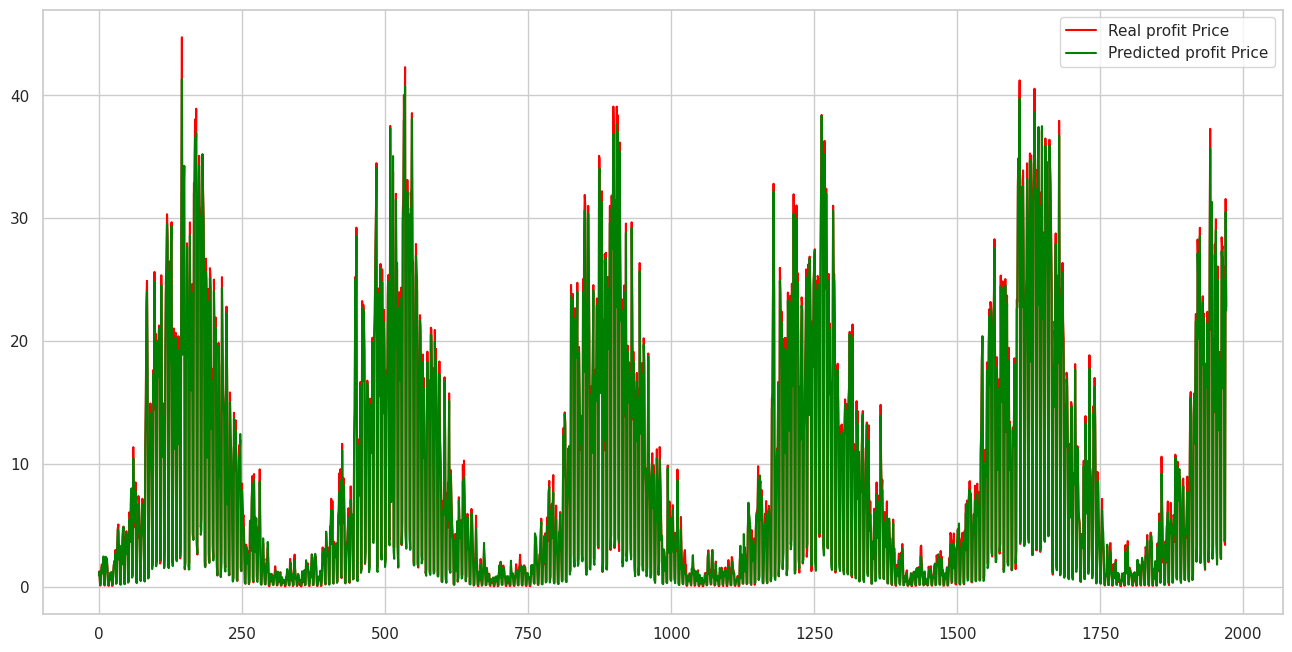

In [ ]:
# Plot the true values of the test and the estimated ones  

plt.figure(figsize=(16,8), dpi= 100, facecolor='w', edgecolor='k')

plt.plot(ylstm_test_ar, color='red', label = 'Real profit Price')
plt.plot(lstm_pred, color='green', label = 'Predicted profit Price')
plt.legend(loc='best')

In [ ]:
print(lstm_pred)

[[ 0.85098284]
 [ 1.0697061 ]
 [ 0.08799255]
 ...
 [ 3.2258682 ]
 [31.133879  ]
 [22.95382   ]]


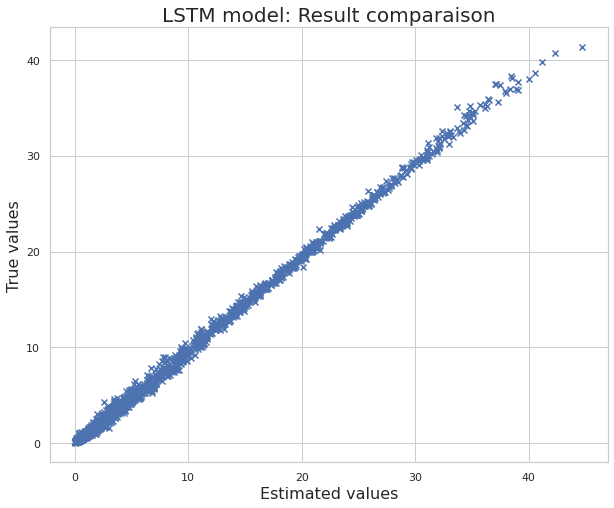

In [ ]:
# Plot the estimations and the actual values

plt.scatter(ylstm_test_ar, lstm_pred,  marker= 'x') # c='red'
plt.title('LSTM model: Result comparaison', fontsize=20)
plt.ylabel("True values", fontsize=16)
plt.xlabel("Estimated values", fontsize=16)

plt.gcf().set_size_inches((10, 8))
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


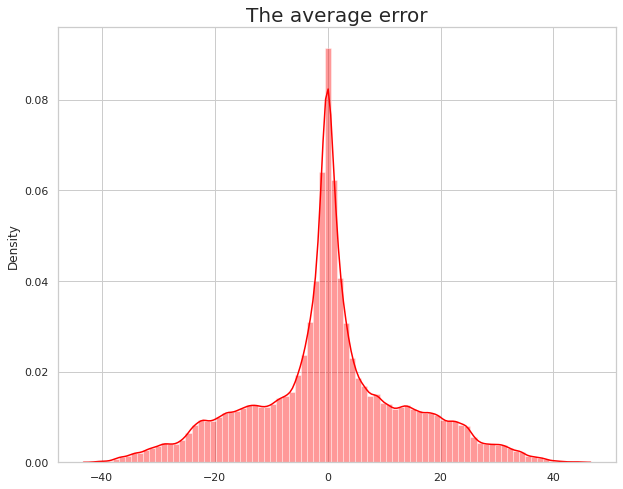

In [ ]:
# Plot the average error of the test data: Plot the distribution of the difference between the actual values and predictions


sns.distplot((ylstm_test_ar - lstm_pred),color ='red', bins=80 ) # color ='red', bins = 30  hue='target', kind='kde', fill=True, palette=sns.color_palette('bright')[:3], height=5, aspect=1.5)
plt.title('The average error', fontsize=20)

plt.gcf().set_size_inches((10, 8))


#sns.set(rc={"figure.figsize": (10, 8)});



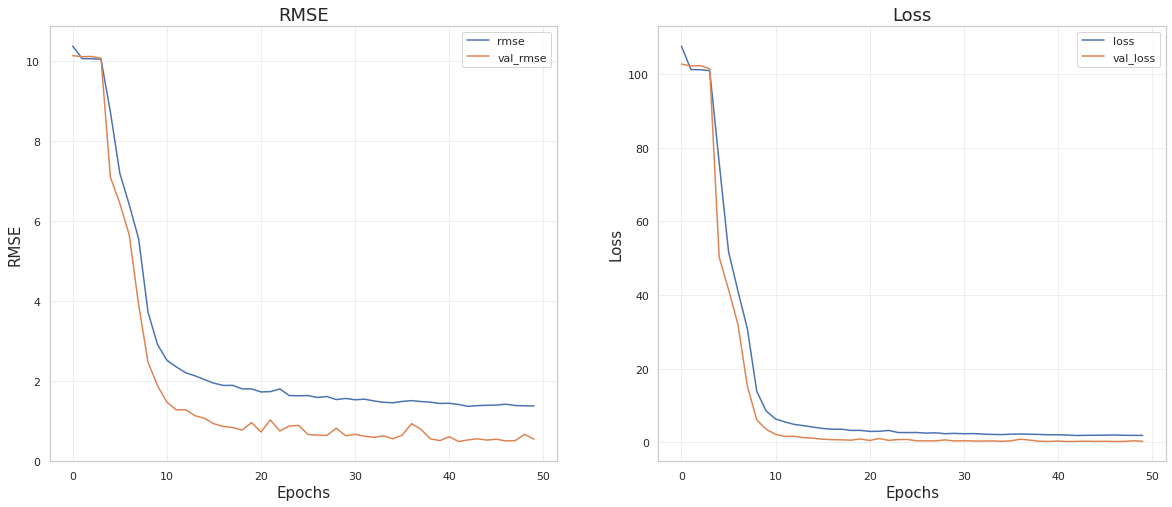

In [ ]:
fig = plt.figure(figsize=(20,7))
fig.add_subplot(121)

# RMSE
plt.plot(history.epoch, history.history['root_mean_squared_error'], label = "rmse")
plt.plot(history.epoch, history.history['val_root_mean_squared_error'], label = "val_rmse")

plt.title("RMSE", fontsize=18)
plt.xlabel("Epochs", fontsize=15)
plt.ylabel("RMSE", fontsize=15)
plt.grid(alpha=0.3)
plt.legend()


#Adding Subplot 1 (For Loss)
fig.add_subplot(122)

plt.plot(history.epoch, history.history['loss'], label="loss")
plt.plot(history.epoch, history.history['val_loss'], label="val_loss")

plt.title("Loss", fontsize=18)
plt.xlabel("Epochs", fontsize=15)
plt.ylabel("Loss", fontsize=15)
plt.grid(alpha=0.3)
plt.legend()

plt.gcf().set_size_inches((20,8))
plt.show()


In [ ]:
# Save the model

lstm_model.save_weights('/content/profit_lstm.h5', overwrite=True)

> ### LSTM Hyper-tuning 

In [ ]:
# Define the tuning parameters 


#learning_rate = [0.01, 0.001, 0.05, 0.02]
#n_neurons = [32, 64, 128, 256]
#n_timesteps = [200, 300, 400, 500]
#n_epochs = [3, 6, 9, 12]

# random [0.018157239717328855, 464, 458, 5]
# hyper 0.0031  278  7  422  0.9350
# genetic type-1 best_model-[24, 54, 3, 429]
#genetic-type-2 # 0.017 & 112 & 4 & 418 & 0.938
#genetic-type-3 [15, 85, 3, 475]


learning_rate =  [0.001, 0.00001 ] # Try this for second chance [0.01, 0.001, 0.05, 0.02, 0.00001] OR [0.01815,0.0031,0.012,0.0075] OR [0.1, 0.001, 0.00001] 
n_neurons = [278,54,85, 20]  # you can add 464
# Use this for the NLP task :  n_timesteps = [458,422,429,475]
n_epochs = [30,60] # [5,7,3]
p_dropout = [0.2,0.4] #[0.1, 0.3, 0.5] # 0.7]
batch_size = [80, 128, 150]


hyper_para = (learning_rate, n_neurons, n_epochs, p_dropout, batch_size )
hyper_para_grid = tuple(itertools.product(*hyper_para, repeat=1))
print('Num of combinations for tuning:',len(hyper_para_grid))
for learning_rate, n_neurons, n_epochs, p_dropout, batch_size in hyper_para_grid:
  print('learning rate:',learning_rate, 'Num of neurons:', n_neurons, 'Dropout:', p_dropout,'Num epochs:', n_epochs, 'Patch size:', batch_size)

Num of combinations for tuning: 96
learning rate: 0.001 Num of neurons: 278 Dropout: 0.2 Num epochs: 30 Patch size: 80
learning rate: 0.001 Num of neurons: 278 Dropout: 0.2 Num epochs: 30 Patch size: 128
learning rate: 0.001 Num of neurons: 278 Dropout: 0.2 Num epochs: 30 Patch size: 150
learning rate: 0.001 Num of neurons: 278 Dropout: 0.4 Num epochs: 30 Patch size: 80
learning rate: 0.001 Num of neurons: 278 Dropout: 0.4 Num epochs: 30 Patch size: 128
learning rate: 0.001 Num of neurons: 278 Dropout: 0.4 Num epochs: 30 Patch size: 150
learning rate: 0.001 Num of neurons: 278 Dropout: 0.2 Num epochs: 60 Patch size: 80
learning rate: 0.001 Num of neurons: 278 Dropout: 0.2 Num epochs: 60 Patch size: 128
learning rate: 0.001 Num of neurons: 278 Dropout: 0.2 Num epochs: 60 Patch size: 150
learning rate: 0.001 Num of neurons: 278 Dropout: 0.4 Num epochs: 60 Patch size: 80
learning rate: 0.001 Num of neurons: 278 Dropout: 0.4 Num epochs: 60 Patch size: 128
learning rate: 0.001 Num of neuron

In [ ]:
# Define the Hyper-tune params function

best_params = {}
def fit_lstm_grid(ds_train, ds_val, y_train, y_val, input_shape):
  min_val_rmse = 999
  current_val_rmse = 0
  for learning_rate, n_neurons, n_epochs, p_dropout, batch_size in hyper_para_grid:
    print('learning rate:',learning_rate, 'Num of neurons:', n_neurons, 'Dropout:', p_dropout,'Num epochs:', n_epochs, 'Patch size:', batch_size)
    with strategy.scope():
      model = Sequential()
      model.add(LSTM(units=n_neurons, return_sequences=True, input_shape=(input_shape, 1)))
      model.add(Dropout(rate=p_dropout))
    
      model.add(LSTM(units=n_neurons, return_sequences=True))
      model.add(Dropout(rate=p_dropout))
    
      model.add(LSTM(units=n_neurons, return_sequences=True))
      model.add(Dropout(rate=p_dropout))
    
      model.add(LSTM(units=n_neurons, return_sequences=False))
      model.add(Dropout(rate=p_dropout))
    
      model.add(Dense(1))
    
      model.compile(loss="mean_squared_error",
              	optimizer=Adam(learning_rate=learning_rate),
              	metrics=[RootMeanSquaredError(), MeanAbsoluteError()])
    
      lstm_callback = tf.keras.callbacks.EarlyStopping(monitor='val_root_mean_squared_error',
                                           	mode='min', patience=10)  
    
    # fit model
    lstm_model = model.fit(ds_train,
                   y_train,
                   validation_data=(ds_val, y_val),
                   epochs=n_epochs,
                   batch_size=batch_size,
                   verbose=1,
                   callbacks=[lstm_callback]
                   ) # Auto splitting :  validation_split=0.2

    current_val_rmse = lstm_model.history['val_root_mean_squared_error'][-1]
    if current_val_rmse < min_val_rmse:
      min_val_rmse = current_val_rmse
      best_params = { 
          "learning_rate" : learning_rate,
          "dropout": p_dropout, 
	        "lstm_units": n_neurons, 
	        "epochs": n_epochs, 
        	"batch_size": batch_size	         
          }
      #best_params = [learning_rate, n_neurons, n_epochs, p_dropout, batch_size]
      print('Best lstm params:')
      pprint(best_params)
    
  return best_params

In [ ]:
def run_lstm_grid():
  best_params = fit_lstm_grid(X_train_ar, X_val_ar, y_train_ar, y_val_ar, num_features)
  return best_params

In [ ]:
start = timer()
best_params = run_lstm_grid()
end=timer()


print("----------------------------------------------------------------------------------------")
print("Time Taken -> ", str(end-start))
print("Best params in order: learning rate, Num of neurons, Epochs Num, Dropout and Patch size.\n")
pprint(best_params)

Streaming output truncated to the last 5000 lines.
Epoch 52/60
178/178 [==============================] - 5s 28ms/step - loss: 3.5276 - root_mean_squared_error: 1.8782 - mean_absolute_error: 1.1909 - val_loss: 0.5125 - val_root_mean_squared_error: 0.7159 - val_mean_absolute_error: 0.4555
Epoch 53/60
178/178 [==============================] - 5s 29ms/step - loss: 3.3350 - root_mean_squared_error: 1.8262 - mean_absolute_error: 1.1678 - val_loss: 0.6049 - val_root_mean_squared_error: 0.7777 - val_mean_absolute_error: 0.5311
Epoch 54/60
178/178 [==============================] - 5s 28ms/step - loss: 3.3441 - root_mean_squared_error: 1.8287 - mean_absolute_error: 1.1765 - val_loss: 0.7087 - val_root_mean_squared_error: 0.8419 - val_mean_absolute_error: 0.5734
Epoch 55/60
178/178 [==============================] - 5s 28ms/step - loss: 3.4524 - root_mean_squared_error: 1.8581 - mean_absolute_error: 1.1731 - val_loss: 1.2339 - val_root_mean_squared_error: 1.1108 - val_mean_absolute_error: 0.76

In [ ]:
# The output of the first test

Best_params1 = {'learning_rate': 0.0031, 'dropout': 0.5, 'lstm_units': 278, 'epochs': 7, 'batch_size': 100}

In [16]:
# The output of the first test || Time Taken ->  19164.38370597

best_params2 = {'batch_size': 128,
 'dropout': 0.2,
 'epochs': 60,
 'learning_rate': 0.001,
 'lstm_units': 278}

> ### Re-train the model with the best params

In [ ]:
# Clear the session if you want

tf.keras.backend.clear_session()


In [17]:
# Initiate the TPU again if you want

resolver = tf.distribute.cluster_resolver.TPUClusterResolver(tpu='grpc://' + os.environ['COLAB_TPU_ADDR'])
tf.config.experimental_connect_to_cluster(resolver)
# This is the TPU initialization code that has to be at the beginning.
tf.tpu.experimental.initialize_tpu_system(resolver)
print("All devices: ")
pprint(tf.config.list_logical_devices('TPU'))
print("-------------------------------------------------------------------")


strategy = tf.distribute.experimental.TPUStrategy(resolver)


All devices: 
[LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:0', device_type='TPU'),
 LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:1', device_type='TPU'),
 LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:2', device_type='TPU'),
 LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:3', device_type='TPU'),
 LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:4', device_type='TPU'),
 LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:5', device_type='TPU'),
 LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:6', device_type='TPU'),
 LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:7', device_type='TPU')]
-------------------------------------------------------------------


In [20]:

# Define the lstm model

def get_model(params, input_shape):
	with strategy.scope():
		model = Sequential()
		model.add(LSTM(units=params["lstm_units"], return_sequences=True, input_shape=(input_shape, 1)))
		model.add(Dropout(rate=params["dropout"]))

		model.add(LSTM(units=params["lstm_units"], return_sequences=True))
		model.add(Dropout(rate=params["dropout"]))

		model.add(LSTM(units=params["lstm_units"], return_sequences=True))
		model.add(Dropout(rate=params["dropout"]))

		model.add(LSTM(units=params["lstm_units"], return_sequences=False))
		model.add(Dropout(rate=params["dropout"]))

		model.add(Dense(1))

		model.compile(loss="mean_squared_error",
              	optimizer=Adam(learning_rate=params["learning_rate"]),
              	metrics=[RootMeanSquaredError(), MeanAbsoluteError()])
	

	return model

#Then we instantiate a model with the tuned set of parameters. 
# The other hyperparameters describe the architecture and the specific choices for training the model. 

lstm_model = get_model(params=best_params2, input_shape=num_features)


lstm_callback = tf.keras.callbacks.EarlyStopping(monitor='val_root_mean_squared_error',
                                           	mode='min', patience=10)

In [21]:
# Display the summary of the model

lstm_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 7, 278)            311360    
                                                                 
 dropout_8 (Dropout)         (None, 7, 278)            0         
                                                                 
 lstm_9 (LSTM)               (None, 7, 278)            619384    
                                                                 
 dropout_9 (Dropout)         (None, 7, 278)            0         
                                                                 
 lstm_10 (LSTM)              (None, 7, 278)            619384    
                                                                 
 dropout_10 (Dropout)        (None, 7, 278)            0         
                                                                 
 lstm_11 (LSTM)              (None, 278)              

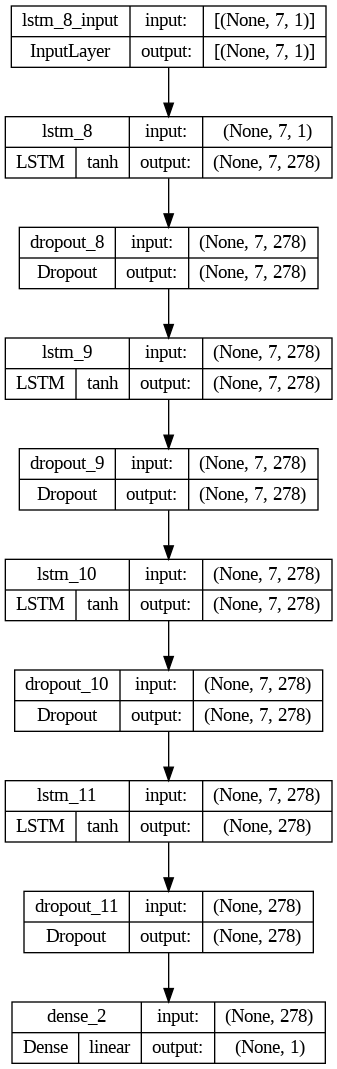

In [22]:
# Plot the lstm architecture

plot_model(
lstm_model,
#to_file="model.png",
show_shapes=True,
show_dtype=False,
show_layer_names=True,
rankdir="TB",
expand_nested=True,
dpi=96,
layer_range=None,
show_layer_activations=True,
)

In [ ]:
# Visualize the architecture using ANN visualizer

from ann_visualizer.visualize import ann_viz

ann_viz(lstm_model, view=True, filename="lstm_model", title="LSTM model architecture")

In [23]:
# Train the model

history_best = lstm_model.fit(
	X_train_ar,
	y_train_ar,
	validation_data=(X_val_ar, y_val_ar),
	epochs=best_params2["epochs"],
	batch_size=best_params2["batch_size"],
	verbose=1,
	callbacks=[lstm_callback]
)

Epoch 1/60
111/111 [==============================] - 23s 95ms/step - loss: 103.4668 - root_mean_squared_error: 10.1719 - mean_absolute_error: 8.2161 - val_loss: 102.3352 - val_root_mean_squared_error: 10.1161 - val_mean_absolute_error: 8.2733
Epoch 2/60
111/111 [==============================] - 3s 31ms/step - loss: 100.7114 - root_mean_squared_error: 10.0355 - mean_absolute_error: 8.2101 - val_loss: 103.1107 - val_root_mean_squared_error: 10.1543 - val_mean_absolute_error: 8.6951
Epoch 3/60
111/111 [==============================] - 4s 32ms/step - loss: 100.5783 - root_mean_squared_error: 10.0289 - mean_absolute_error: 8.2177 - val_loss: 101.9728 - val_root_mean_squared_error: 10.0982 - val_mean_absolute_error: 8.3751
Epoch 4/60
111/111 [==============================] - 3s 30ms/step - loss: 100.8347 - root_mean_squared_error: 10.0416 - mean_absolute_error: 8.2307 - val_loss: 102.2401 - val_root_mean_squared_error: 10.1114 - val_mean_absolute_error: 8.3008
Epoch 5/60
111/111 [=======

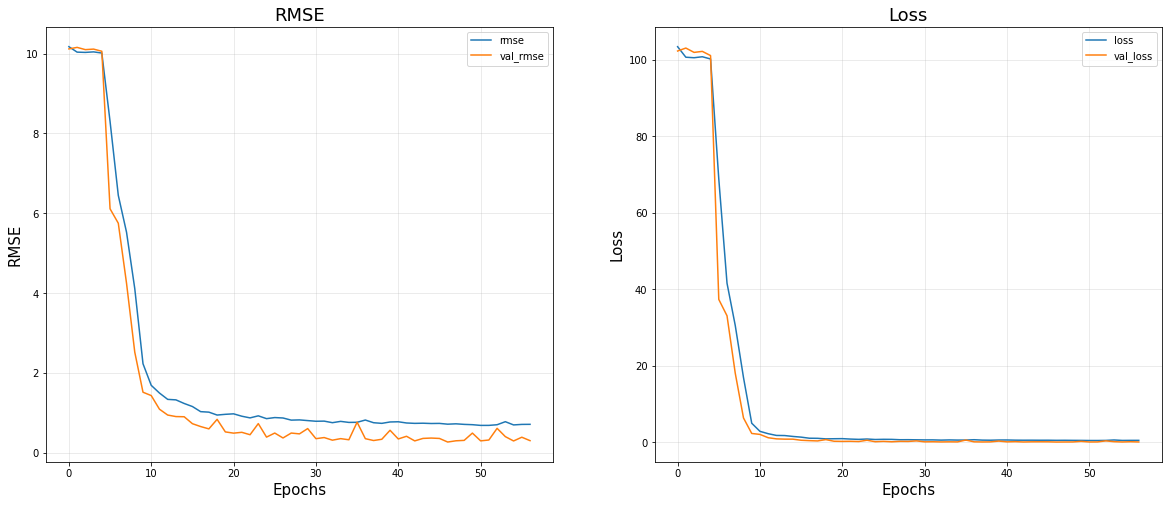

In [30]:
fig = plt.figure(figsize=(20,7))
fig.add_subplot(121)

# RMSE
plt.plot(history_best.epoch, history_best.history['root_mean_squared_error'], label = "rmse")
plt.plot(history_best.epoch, history_best.history['val_root_mean_squared_error'], label = "val_rmse")

plt.title("RMSE", fontsize=18)
plt.xlabel("Epochs", fontsize=15)
plt.ylabel("RMSE", fontsize=15)
plt.grid(alpha=0.3)
plt.legend()


#Adding Subplot 1 (For Loss)
fig.add_subplot(122)

plt.plot(history_best.epoch, history_best.history['loss'], label="loss")
plt.plot(history_best.epoch, history_best.history['val_loss'], label="val_loss")

plt.title("Loss", fontsize=18)
plt.xlabel("Epochs", fontsize=15)
plt.ylabel("Loss", fontsize=15)
plt.grid(alpha=0.3)
plt.legend()

plt.gcf().set_size_inches((20,8))
plt.show()


In [31]:
# Evaluate the results

results = lstm_model.evaluate(test_df_ar, ylstm_test_ar)
print("test loss, test acc:", np.round(results, 4))

62/62 [==============================] - 3s 33ms/step - loss: 0.0837 - root_mean_squared_error: 0.2893 - mean_absolute_error: 0.2033
test loss, test acc: [0.0837 0.2893 0.2033]


In [32]:
# Predictions
## By using the trained model
lstm_pred= lstm_model.predict(test_df_ar)


#ylstm_test_ar

62/62 [==============================] - 4s 35ms/step


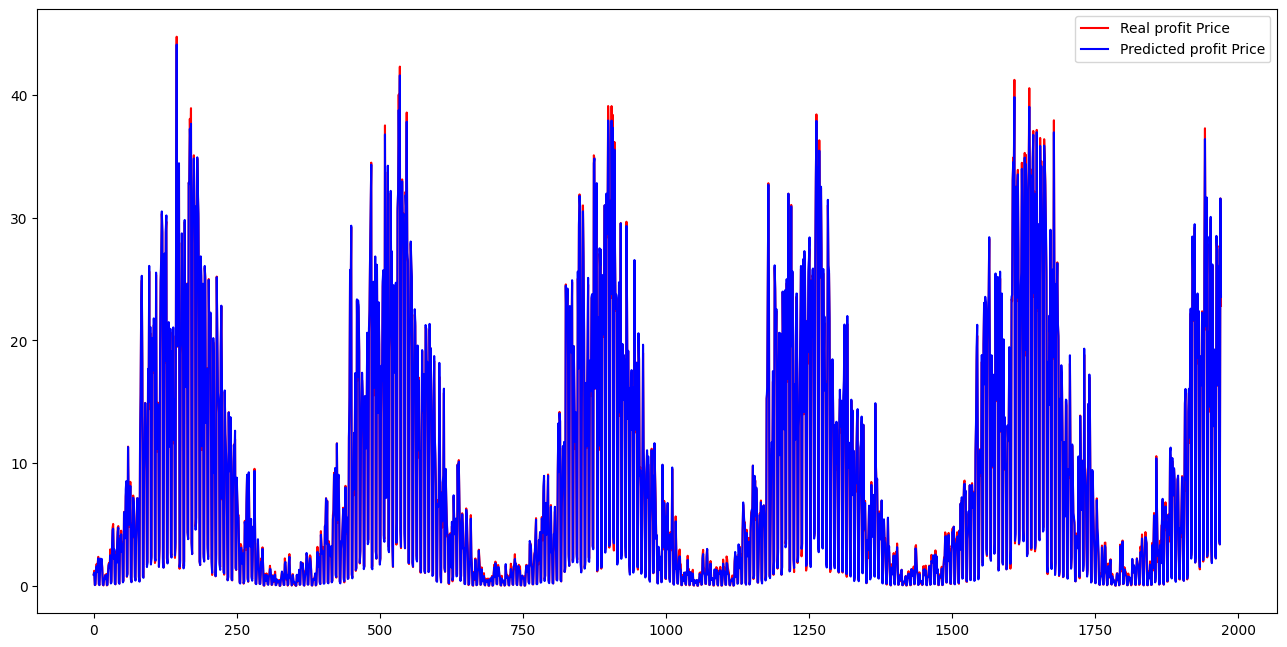

In [35]:
# Plot the true values of the test and the estimated ones  

plt.figure(figsize=(16,8), dpi= 100, facecolor='w', edgecolor='k')

plt.plot(ylstm_test_ar, color='red', label = 'Real profit Price')
plt.plot(lstm_pred, color='blue', label = 'Predicted profit Price')
plt.legend(loc='best')

In [36]:
# Save the model

lstm_model.save_weights('/content/profit_lstm.h5', overwrite=True)

# Appendix

In this section, I wanted to explain several things and mention various modifications that I wanted to try before send you the final results. Because, I didn't want to waste the time and since this is like a test. 
* I tried to use several types of algorithms. However, I sent you just the classical machine learning models that I know their performing and what can  acheive. Others, I searched for them.
* I planned to try the Long short term memory - [LSTM](https://www.analyticsvidhya.com/blog/2022/03/an-overview-on-long-short-term-memory-lstm/#:~:text=Long%20short%2Dterm%20memory%20(LSTM,involving%20sequences%20and%20time%20series.) model (deep learning) and the [Prophet](https://facebook.github.io/prophet/) algorithm. But, to try these two, it will take a littbe bit longer than I accepected. I will attach several comands that I will use if you want me to continue my work.  
* The model that I used here,for demonstration puspose only, is the best RMSE results obtained after the hyper-tunning of the models parameters. I tried to use grid search algorithm to tune the parameters because it tries all the combinations possible. However, this occurs in interrupt the training and kills the runtime of the colab. Therefore, I used the a small sample of the parameters to find the best estimator. After finding the best model, you can also try to decrease the search space by chossing other parameters around the best param that you found. For example, *n_estimators* is 400 for the best combination. You can choose other param like 370,380,390,410,420,430, and then try to tune the parameters.
* The following results is for additional descriptions only

> # The prophet model

In [ ]:
# > Use the following command to install Prophet: 
!pip install prophet

## - Preprocess the dataset

In [ ]:
# Define the model

from prophet import Prophet

# initialiazing the model with 95% confidence interval. The default value is 80%
m_prophet = Prophet(interval_width= 0.95)

In [ ]:
df_copy_pro = df.copy()

# Rename the date column into 'Date' instead of 'output_date'
df_copy_pro.rename(columns={"output_date": 'Date'}, inplace = True)

  # Set the date column as the index column
df_copy_pro["Date"] = pd.to_datetime(df_copy_pro["Date"])
Y_pro = df_copy_pro["Date", "output_own_profits"].copy()
#df_copy_pro.set_index("Date", drop=True, inplace=True )
 
 
df_copy_pro.head()